In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from env import get_connection
import os
from pydataset import data



def get_titanic(get_con_func):
    
    if os.path.isfile('titanic.csv'):
        
        return pd.read_csv('titanic.csv')
    
    else:
        url = get_con_func('titanic_db')
        query = '''SELECT * FROM passengers'''
        df = pd.read_sql(query, url)
        df.to_csv('titanic.csv')
        return df

In [5]:
pd.read_excel('titanic.xlsx')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
pd.read_clipboard()

,"""https://gist.githubusercontent.com/ryanorsinger/bec2f59a9cef8ae7428cb70b3541354a/raw/ef64298da52e5d70f4d388f5fd48eccdb02ed3f1/ice_cream.csv"""


## Exercises

In [12]:
db_iris = data('iris')
db_iris = pd.DataFrame(db_iris)
db_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [14]:
db_iris.shape

(150, 5)

In [15]:
db_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [17]:
db_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [18]:
db_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [25]:
df_google.shape

(891, 12)

In [26]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df_google['Sex'].unique()

array(['male', 'female'], dtype=object)

In [35]:
df_google['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
df_excel = pd.read_excel('titanic.xlsx')
df_excel.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
df_excel_sample = df_excel.head(100)
df_excel.shape

(891, 12)

In [45]:
df_excel_sample.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [60]:
df_excel_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  100 non-null    int64  
 1   Survived     100 non-null    int64  
 2   Pclass       100 non-null    int64  
 3   Name         100 non-null    object 
 4   Sex          100 non-null    object 
 5   Age          78 non-null     float64
 6   SibSp        100 non-null    int64  
 7   Parch        100 non-null    int64  
 8   Ticket       100 non-null    object 
 9   Fare         100 non-null    float64
 10  Cabin        20 non-null     object 
 11  Embarked     99 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.5+ KB


In [53]:
df_excel_sample.select_dtypes(include=object).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [8]:
df_excel_min_max = pd.DataFrame(columns=['max','min'])
df_excel_min_max['max'] = df_excel.select_dtypes(exclude=object).max()
df_excel_min_max['min'] = df_excel.select_dtypes(exclude=object).min()
df_excel_min_max

,max,min
PassengerId,891.0000,1.00
Survived,1.0000,0.00
Pclass,3.0000,1.00
Age,80.0000,0.42
SibSp,8.0000,0.00
Parch,6.0000,0.00
Fare,512.3292,0.00


In [373]:
from acquire import get_titanic_data

get_titanic_data(get_connection).head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [374]:
from acquire import get_iris_data

get_iris_data(get_connection).head()

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa


In [375]:
from acquire import get_telco_data

get_telco_data(get_connection).head()

,Unnamed: 0,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,2,1,1,2,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from acquire import get_titanic_data

Overfitting:

Train/Validate/Test

Model Training

When a model is overfit, it makes impeccable guesses on the training dataset.

An overfit model makes poor (relatively) predictions on out-of-sample data.

Out-of-sample data can be the validation and test sets. 

In [4]:
df = get_titanic_data(get_connection)
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [9]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


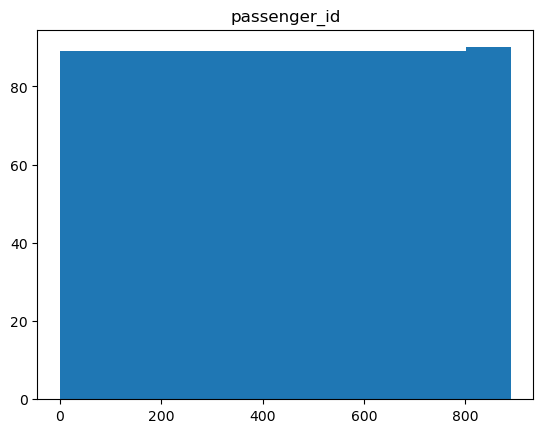

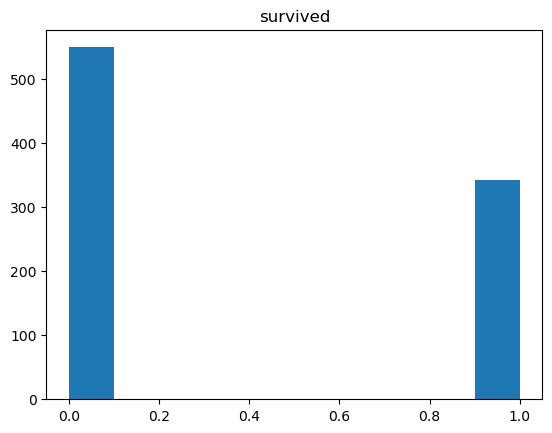

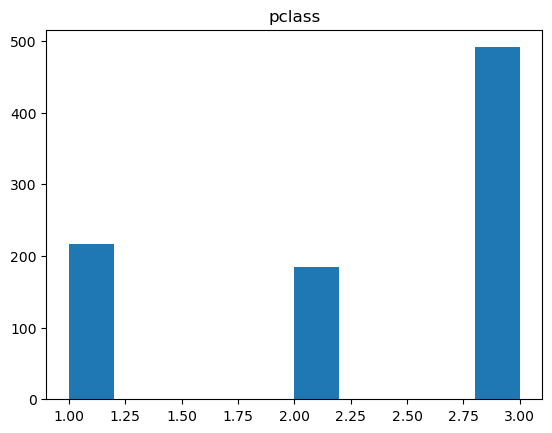

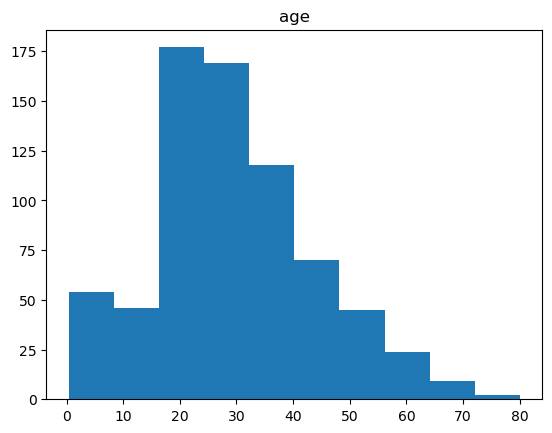

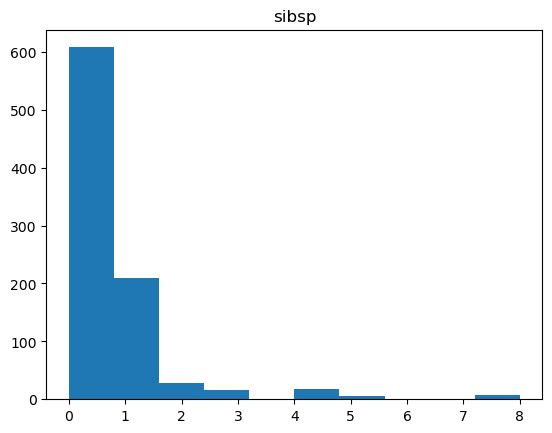

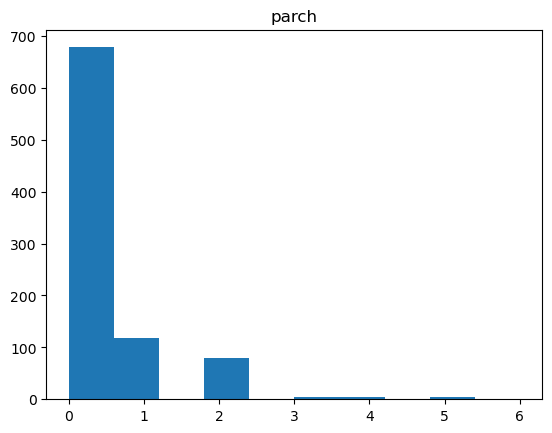

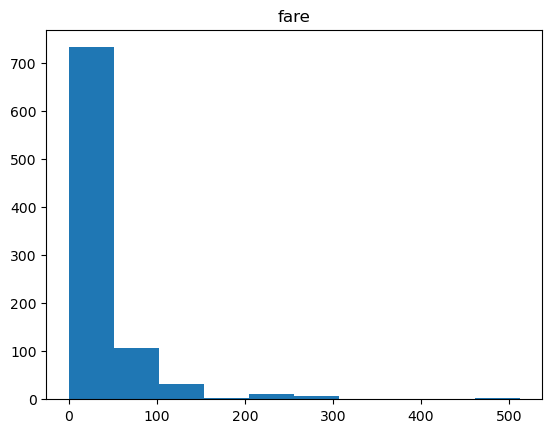

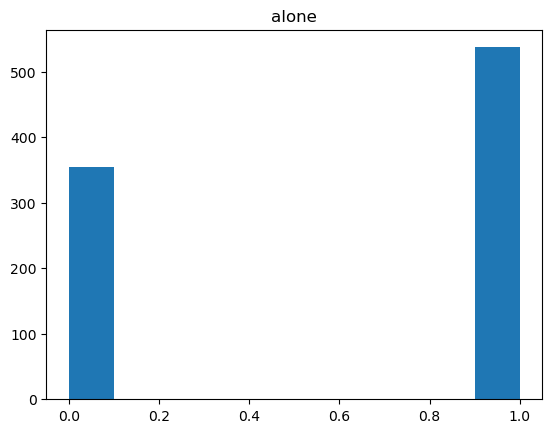

In [14]:
numerical_cols = df.select_dtypes(exclude='object').columns.to_list()

for col in numerical_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [19]:
categorical_cols = df.select_dtypes(include='object').columns.to_list()

for col in categorical_cols:
    print(df[col].value_counts())
    print('-----------------')
    

male      577
female    314
Name: sex, dtype: int64
-----------------
S    644
C    168
Q     77
Name: embarked, dtype: int64
-----------------
Third     491
First     216
Second    184
Name: class, dtype: int64
-----------------
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
-----------------
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
-----------------


There is duplicate information

Get rid of class and embarked (duplicates).
Drop deck column for excess null values.
Drop passenger_id because it is not helpful.
Drop age column because it may be difficult to impute.


In [24]:
df1 = df.drop(columns=['class','embarked', 'passenger_id', 'deck', 'age'])

In [25]:
df1

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Southampton,1
887,1,1,female,0,0,30.0000,Southampton,1
888,0,3,female,1,2,23.4500,Southampton,0
889,1,1,male,0,0,30.0000,Cherbourg,1


In [26]:
df1['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [28]:
df1['embark_town'].fillna('Southampton', inplace=True)

In [34]:
dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first=[True])

In [35]:
df = pd.concat([df, dummies], axis=1)

In [36]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1,1,0,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1,0,0,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1,1,0,0


In [44]:
def clean_titanic(df):
    df.drop(columns=['class','embarked', 'passenger_id', 'deck', 'age', 'Unnamed: 0'], inplace=True)
    
    df['embark_town'].fillna('Southampton', inplace=True)
    
    dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first=[True])
    
    df = pd.concat([df, dummies], axis=1)
    
    return df

In [45]:
test_df = get_titanic_data(get_connection)
test_df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [46]:
clean_df = clean_titanic(test_df)
clean_df.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [47]:
seed = 42

train, test = train_test_split(df, train_size=.7, random_state=seed, stratify=df['survived'])

In [48]:
train.shape, test.shape

((623, 16), (268, 16))

In [49]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
748,748,0,1,male,19.0,1,0,53.1000,S,First,D,Southampton,0,1,0,1
45,45,0,3,male,NaN,0,0,8.0500,S,Third,NaN,Southampton,1,1,0,1
28,28,1,3,female,NaN,0,0,7.8792,Q,Third,NaN,Queenstown,1,0,1,0
633,633,0,1,male,NaN,0,0,0.0000,S,First,NaN,Southampton,1,1,0,1
403,403,0,3,male,28.0,1,0,15.8500,S,Third,NaN,Southampton,0,1,0,1


In [52]:
seed = 42

train, val_test = train_test_split(df, train_size=.7, random_state=seed, stratify=df['survived'])


In [53]:
validate, test = train_test_split(val_test, train_size=.5, random_state=seed, stratify=val_test['survived'])


In [54]:
train.shape, validate.shape, test.shape

((623, 16), (134, 16), (134, 16))

In [55]:
def train_val_test(df):
    seed = 42 
    train, val_test = train_test_split(df, train_size=.7, random_state=seed, stratify=df['survived'])
    
    validate, test = train_test_split(val_test, train_size=.5, random_state=seed, stratify=val_test['survived'])
    
    return train, validate, test


In [72]:
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
impute_df = get_titanic_data(get_connection)
impute_df

In [70]:
train, validate, test = train_val_test(impute_df)

In [71]:
train.shape

(623, 14)

In [76]:
imputer.fit(train[['embark_town']])

SimpleImputer(strategy='most_frequent')

In [77]:
train['embark_town'].isna().sum()

2

In [82]:
train['embark_town'] = imputer.transform(train[['embark_town']])

In [83]:
train['embark_town'].isna().sum()

0

## Exercises

Use the function defined in acquire.py to load the iris data.

Drop the species_id and measurement_id columns.

Rename the species_name column to just species.

Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [161]:
from acquire import get_iris_data
iris = get_iris_data(get_connection)
iris.head()

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa


In [155]:
iris.drop(columns=['species_id', 'measurement_id', 'Unnamed: 0'], inplace=True)


In [156]:
iris.rename(columns={'species_name':'species'}, inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [157]:
iris_dummies = pd.get_dummies(iris[['species']], drop_first=True)
iris = pd.concat([iris, iris_dummies], axis=1)

In [158]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [162]:
def prep_iris(iris):
    iris.drop(columns=['species_id', 'measurement_id', 'Unnamed: 0'], inplace=True)
    
    iris.rename(columns={'species_name':'species'}, inplace=True)
    
    iris_dummies = pd.get_dummies(iris[['species']], drop_first=True)
    iris = pd.concat([iris, iris_dummies], axis=1)
    
    return iris

Use the function defined in acquire.py to load the Titanic data.

Drop any unnecessary, unhelpful, or duplicated columns.

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [165]:
titanic = get_titanic_data(get_connection)
titanic.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [164]:
titanic.drop(columns=['Unnamed: 0', 'passenger_id', 'age', 'embarked', 'class', 'deck'], inplace=True)
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


In [113]:
titanic_dummies = pd.get_dummies(titanic[['sex', 'embark_town']], drop_first=True)
titanic = pd.concat([titanic, titanic_dummies], axis=1)
titanic

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


In [383]:
def prep_titanic(titanic):
    titanic.drop(columns=['class','embarked', 'passenger_id', 'deck', 'age', 'Unnamed: 0'], inplace=True)
    
    titanic_dummies = pd.get_dummies(titanic[['sex', 'embark_town']], drop_first=True)
    titanic = pd.concat([titanic, titanic_dummies], axis=1)
    
    return titanic

Use the function defined in acquire.py to load the Telco data.

Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [169]:
from acquire import get_telco_data

telco = get_telco_data(get_connection)
telco.head()


,Unnamed: 0,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,2,1,1,2,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [143]:
telco.drop(columns=['Unnamed: 0', 'payment_type_id', 'contract_type_id', 'internet_service_type_id', 'customer_id'], inplace=True)
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [144]:
telco_dummies = pd.get_dummies(telco[['gender', 'partner', 'dependents', 
                                      'phone_service', 'multiple_lines', 
                                      'online_security', 'online_backup', 
                                      'device_protection', 'tech_support', 
                                      'streaming_tv', 'streaming_movies', 
                                      'paperless_billing', 'churn', 'internet_service_type', 
                                      'contract_type', 'payment_type']], drop_first=True)

telco_dummies

,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
3,1,1,0,1,0,0,0,0,0,1,...,1,1,1,1,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
7039,1,1,0,1,0,1,0,0,0,0,...,1,1,1,1,0,0,0,0,1,0
7040,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
7041,1,1,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1


In [145]:
telco = pd.concat([telco, telco_dummies], axis=1)
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,0,0,1,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,1,1,0,0,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,1,1,1,0,0,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,1,1,1,0,0,0,0,0,1


In [172]:
def prep_telco(telco):
    telco.drop(columns=['Unnamed: 0', 'payment_type_id', 'contract_type_id', 
                        'internet_service_type_id', 'customer_id'], inplace=True)
    
    telco['total_charges'] = (telco['total_charges'] + '0').astype('float')

    
    telco_dummies = pd.get_dummies(telco[['gender', 'partner', 'dependents', 
                                      'phone_service', 'multiple_lines', 
                                      'online_security', 'online_backup', 
                                      'device_protection', 'tech_support', 
                                      'streaming_tv', 'streaming_movies', 
                                      'paperless_billing', 'churn', 'internet_service_type', 
                                      'contract_type', 'payment_type']], drop_first=True)
    
    telco = pd.concat([telco, telco_dummies], axis=1)
    
    return telco

prep_telco(telco).head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,0,0,1,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,1,1,0,0,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,1,1,1,0,0,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,1,1,1,0,0,0,0,0,1


Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [147]:
def train_val_test(df, col):
    seed = 42 
    train, val_test = train_test_split(df, train_size=.7, random_state=seed, stratify=df[col])
    
    validate, test = train_test_split(val_test, train_size=.5, random_state=seed, stratify=val_test[col])
    
    return train, validate, test

In [148]:
train_iris, val_iris, test_iris = train_val_test(iris, 'species')
train_iris.shape, val_iris.shape, test_iris.shape

((105, 8), (22, 8), (23, 8))

In [149]:
train_titanic, val_titanic, test_titanic = train_val_test(titanic, 'survived')
train_titanic.shape, val_titanic.shape, test_titanic.shape

((623, 11), (134, 11), (134, 11))

In [150]:
train_telco, val_telco, test_telco = train_val_test(telco, 'gender')
train_telco.shape, val_telco.shape, test_telco.shape

((4930, 47), (1056, 47), (1057, 47))

## Data Exploration

In [199]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.model_selection import train_test_split

import acquire
from prepare import train_val_test

import warnings
warnings.filterwarnings('ignore')

In [212]:
taxis = sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [213]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [214]:
taxis['payment'].value_counts()

credit card    4577
cash           1812
Name: payment, dtype: int64

In [215]:
taxis['color'].value_counts()

yellow    5451
green      982
Name: color, dtype: int64

In [216]:
taxis.describe().T

,count,mean,std,min,25%,50%,75%,max
passengers,6433.0,1.539251,1.203768,0.0,1.00,1.00,2.00,6.00
distance,6433.0,3.024617,3.827867,0.0,0.98,1.64,3.21,36.70
fare,6433.0,13.091073,11.551804,1.0,6.50,9.50,15.00,150.00
tip,6433.0,1.979220,2.448560,0.0,0.00,1.70,2.80,33.20
tolls,6433.0,0.325273,1.415267,0.0,0.00,0.00,0.00,24.02
total,6433.0,18.517794,13.815570,1.3,10.80,14.16,20.30,174.82


In [217]:
taxis = taxis.drop(columns=['pickup', 'dropoff', 'pickup_zone', 'dropoff_zone'], axis=1)

In [218]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passengers       6433 non-null   int64  
 1   distance         6433 non-null   float64
 2   fare             6433 non-null   float64
 3   tip              6433 non-null   float64
 4   tolls            6433 non-null   float64
 5   total            6433 non-null   float64
 6   color            6433 non-null   object 
 7   payment          6389 non-null   object 
 8   pickup_borough   6407 non-null   object 
 9   dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 502.7+ KB


In [219]:
taxis.isnull().sum()

passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_borough     26
dropoff_borough    45
dtype: int64

In [229]:
taxis = taxis.dropna(axis=0)

In [230]:
taxis.isnull().sum()
taxis.shape

(6341, 19)

In [233]:
dummy_df = pd.get_dummies(taxi[['color', 'payment', 'pickup_borough', 'dropoff_borough']], drop_first=True)
dummy_df.dropna()

,color_yellow,payment_credit card,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,1,1,0,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0
2,1,1,0,1,0,0,1,0,0
3,1,1,0,1,0,0,1,0,0
4,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
6428,0,1,0,1,0,0,1,0,0
6429,0,1,0,0,1,0,0,0,0
6430,0,0,1,0,0,1,0,0,0
6431,0,1,1,0,0,1,0,0,0


In [234]:
dummy_df.shape

(6433, 9)

In [236]:
taxis = pd.concat([taxis, dummy_df], axis=1)
taxis = taxis.dropna()

In [240]:
taxis = taxis.rename(columns={'payment_credit card': 'payment_credit_card', 'dropoff_borough_Staten Island':'dropoff_borough_Staten_Island'})
taxis.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough,...,dropoff_borough_Staten_Island,color_yellow,payment_credit_card,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten_Island
0,1.0,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Manhattan,Manhattan,...,0,1,1,0,1,0,0,1,0,0
1,1.0,0.79,5.0,0.00,0.0,9.30,yellow,cash,Manhattan,Manhattan,...,0,1,0,0,1,0,0,1,0,0
2,1.0,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Manhattan,Manhattan,...,0,1,1,0,1,0,0,1,0,0
3,1.0,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Manhattan,Manhattan,...,0,1,1,0,1,0,0,1,0,0
4,3.0,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Manhattan,Manhattan,...,0,1,1,0,1,0,0,1,0,0


In [241]:
num_vars = taxis.select_dtypes(include=['int64', 'float'])
cat_vars = taxis.select_dtypes(include=['object', 'uint8'])

In [242]:
train, validate, test = train_val_test(taxis, 'color')
train.shape, validate.shape, test.shape

((4438, 37), (951, 37), (952, 37))

# Exercises

In [489]:
iris = prep_iris(get_iris_data(get_connection))
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [490]:
train, val, test = train_val_test(iris, 'species')
train.shape, val.shape, test.shape

((105, 7), (22, 7), (23, 7))

## Univariate Stats

In [486]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import env
from scipy import stats
from sklearn.model_selection import train_test_split
import prepare

In [265]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        150 non-null    float64
 1   sepal_width         150 non-null    float64
 2   petal_length        150 non-null    float64
 3   petal_width         150 non-null    float64
 4   species             150 non-null    object 
 5   species_versicolor  150 non-null    uint8  
 6   species_virginica   150 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 6.3+ KB


In [466]:
num_vars = iris.select_dtypes(exclude=['object', 'uint8'])
cat_vars = iris.select_dtypes(include=['object', 'uint8'])

sepal_length


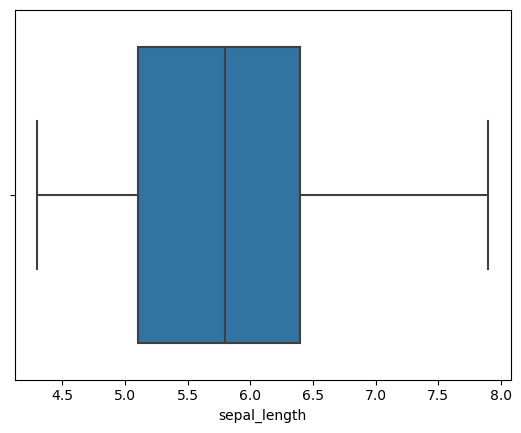

sepal_width


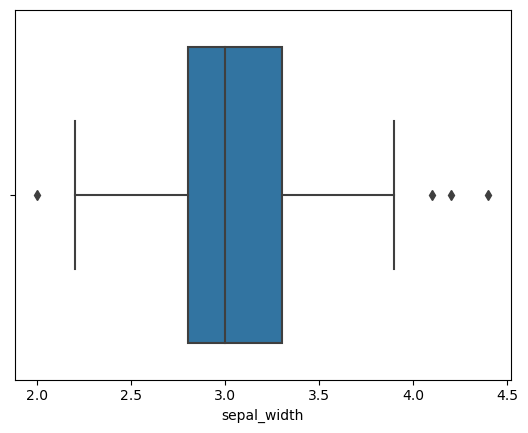

petal_length


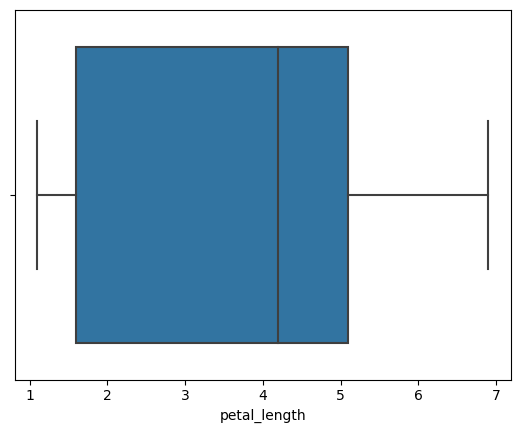

petal_width


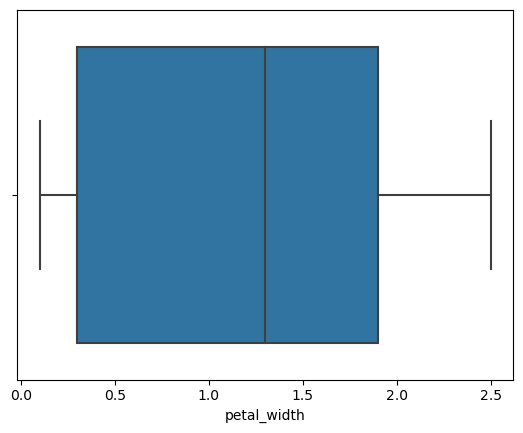

In [275]:
for col in num_vars:
    print(col)
    sns.boxplot(x=col, data=train)
    plt.show()

sepal_length


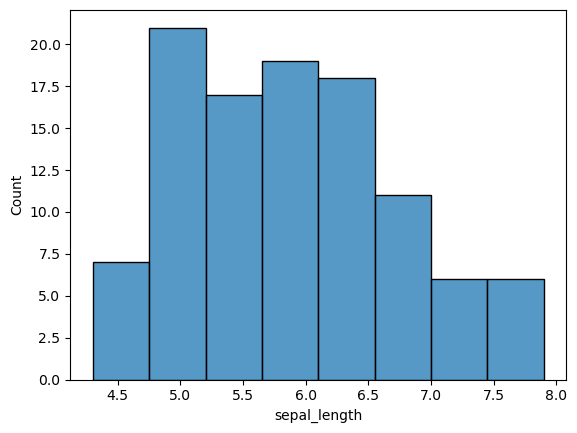

sepal_width


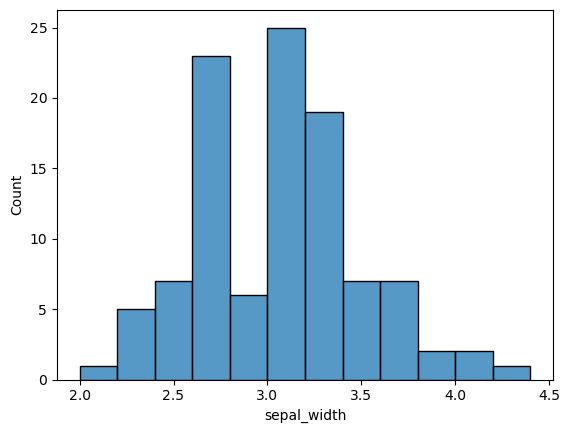

petal_length


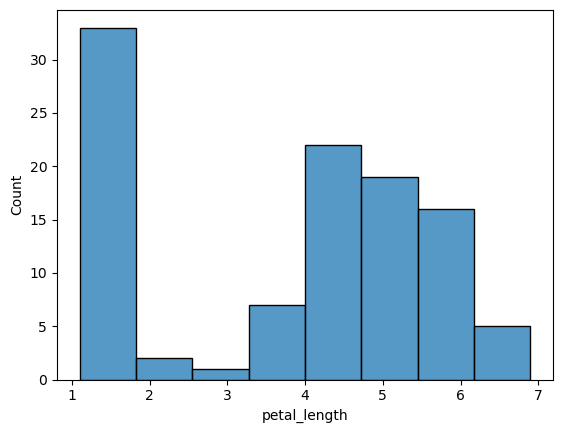

petal_width


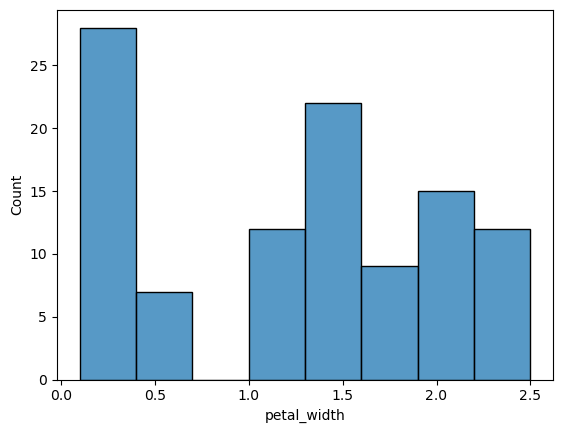

In [276]:
for col in num_vars:
    print(col)
    sns.histplot(x=col, data=train)
    plt.show()
    


- Takeaways: sepal length and width are normally distributed 
- there are a lot of petals with lengths of 1 and then the large majority is 4 or more
- there are a lot of petals that have widths of 0.5 or less with none have a width between .5 and 1.

## Bivariate Stats

versicolor    35
setosa        35
virginica     35
Name: species, dtype: int64
versicolor    33.333333
setosa        33.333333
virginica     33.333333
Name: species, dtype: float64


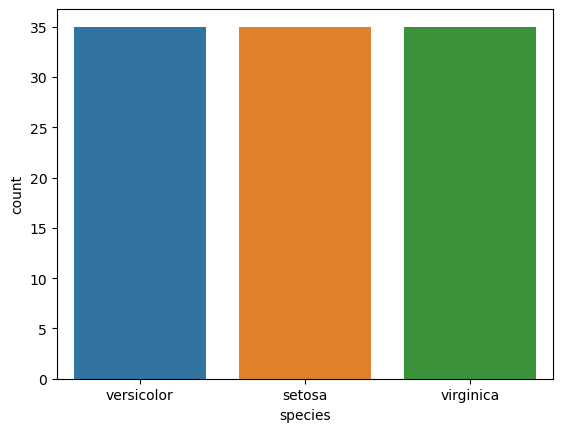

In [298]:
print(train['species'].value_counts())
print(train['species'].value_counts(normalize=True) * 100)
sns.countplot(x='species', data=train)
plt.show()
#Takeaways: I thought the barplot would produce more information than just 3 identical bars.

sepal_length


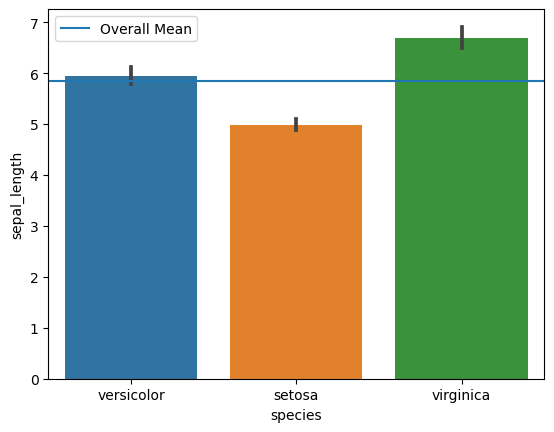

sepal_width


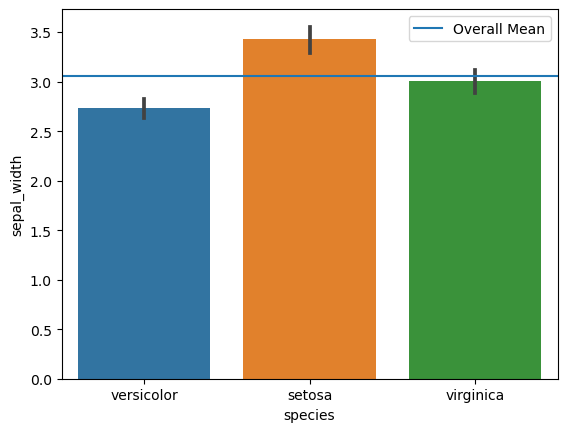

petal_length


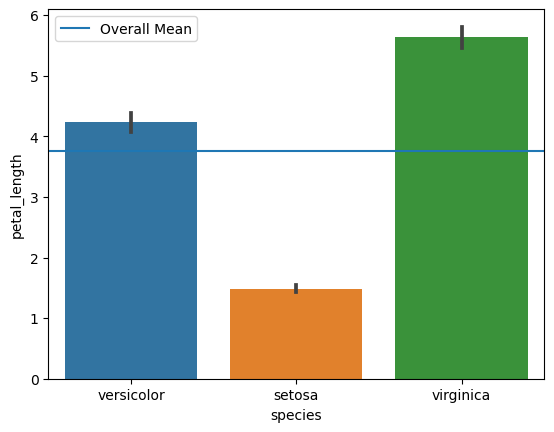

petal_width


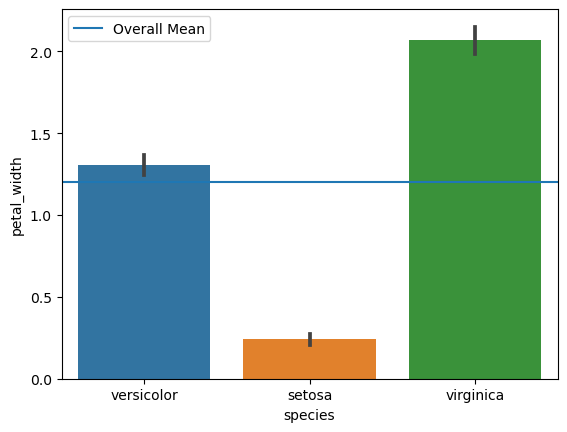

In [487]:
for col in num_vars:
    print(col)
    sns.barplot(x='species', y=col, data=train)
    plt.axhline(num_vars[col].mean(), label="Overall Mean")
    plt.legend()
    plt.show()

- The setosa species dimensions fluctuates a lot but the other two seem to stay pretty close to one another
- On average the virginica species is larger.


In [ ]:
stats.manwhitneyu(train[train['species']='virginica']['petal_width'])

## Multivariate Stats

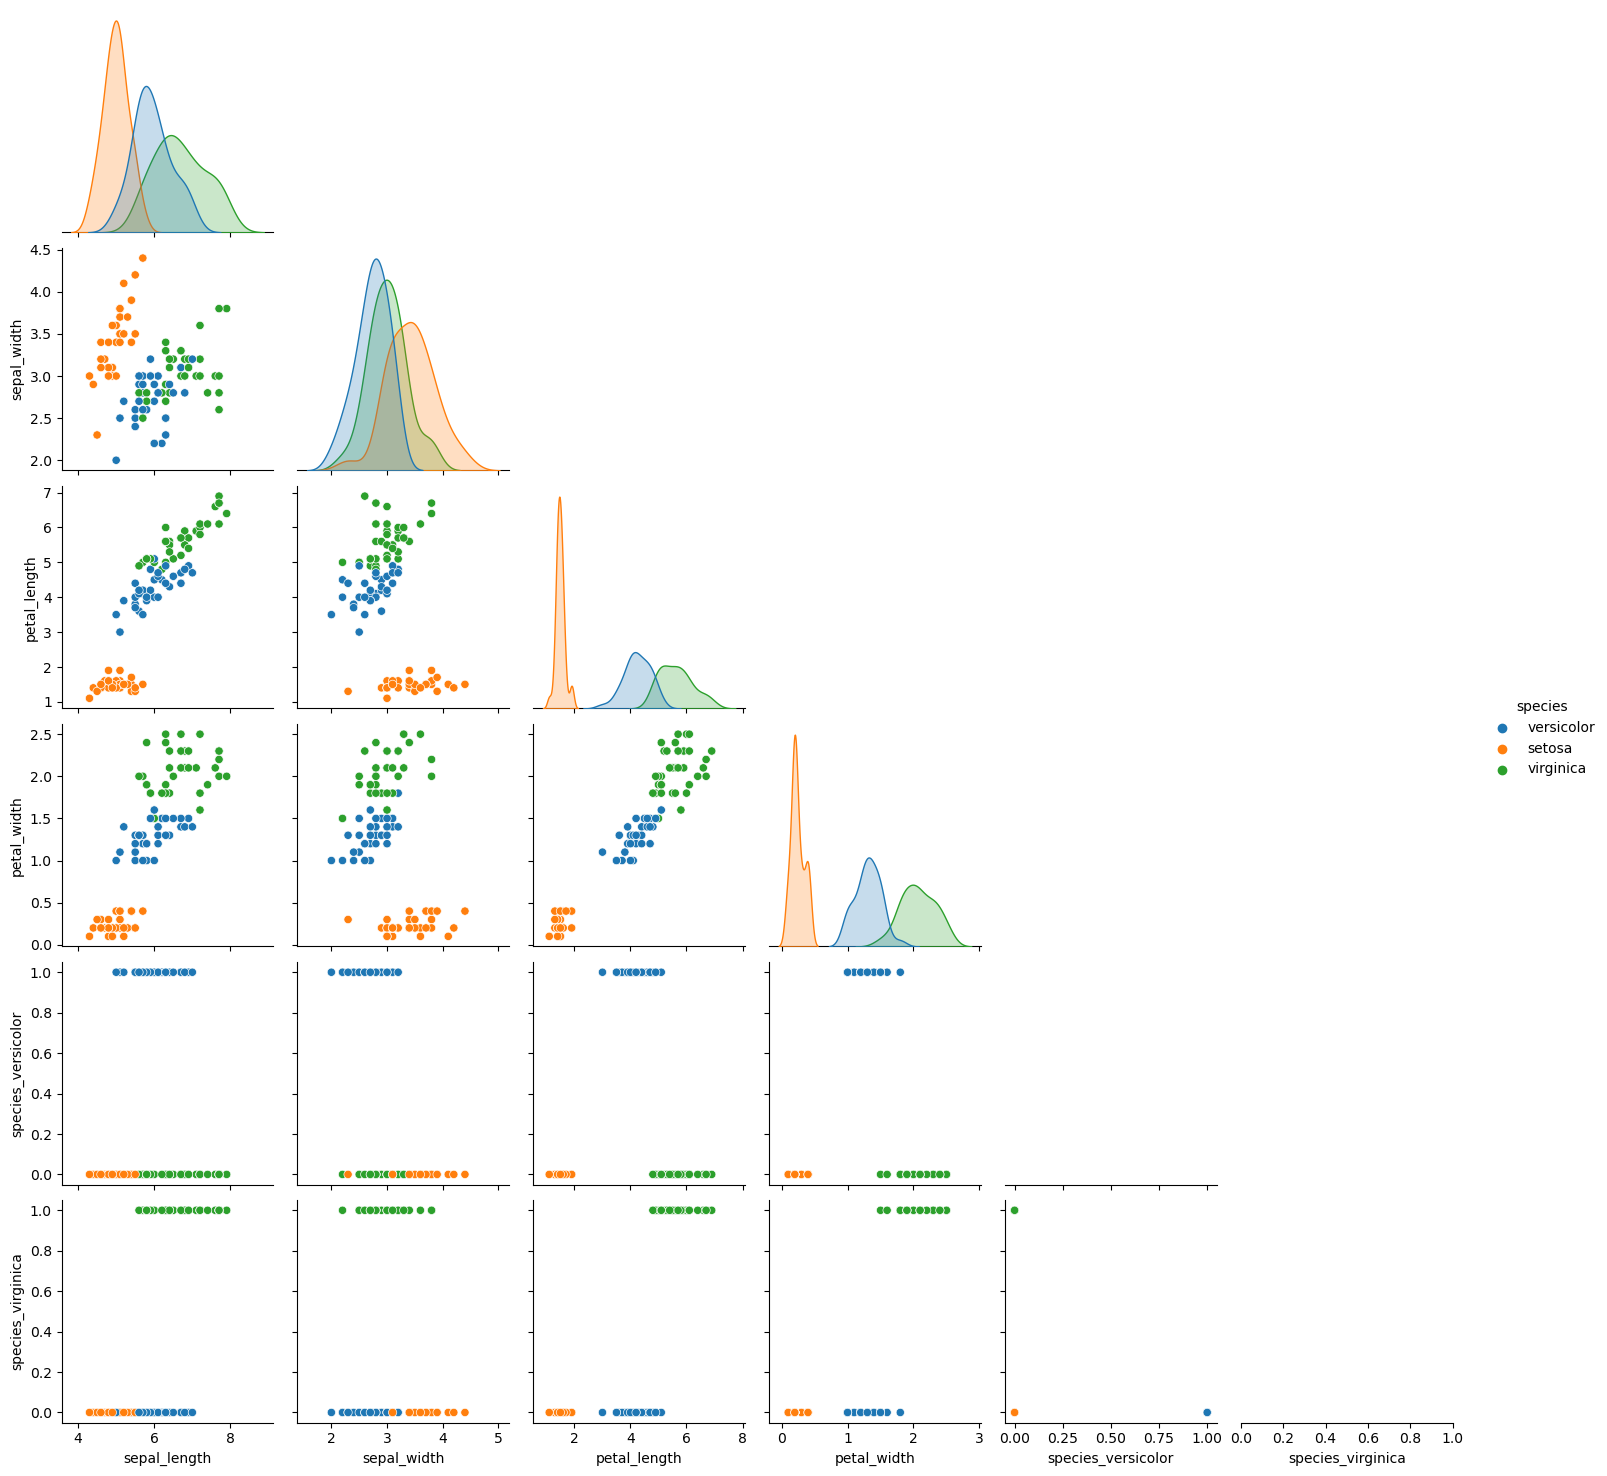

In [312]:
sns.pairplot(train, hue='species', corner=True)

In [491]:
train['sepal_area'] = train['sepal_length'] * train['sepal_width']
train['petal_area'] = train['petal_length'] * train['petal_width']

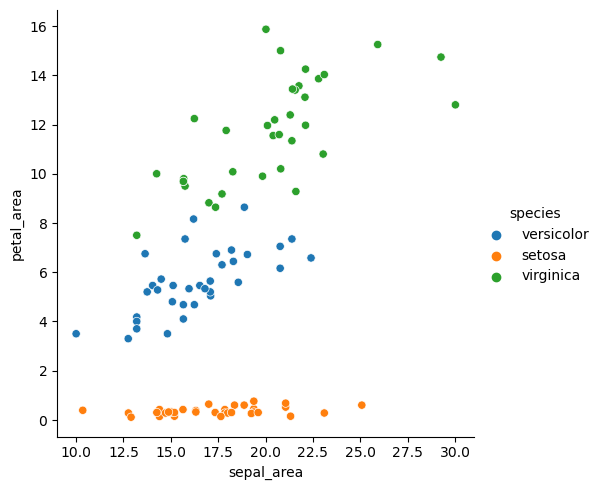

In [492]:
sns.relplot(x='sepal_area', y='petal_area', data=train, hue='species')

## Takeaways:
- Petal length and width can be used to distinguish from the others, and can be helpful for the other 2. 
- Setosa has the shortest petal length and width. 
- Virginica has the longest of both of these. 
- Sepal length can also help separrate virginica and versicolor, as virginica is slightly shorter. 
- Virginica and versicolor overlap in sepal width. Speal area does not seem to add any value beyond what 

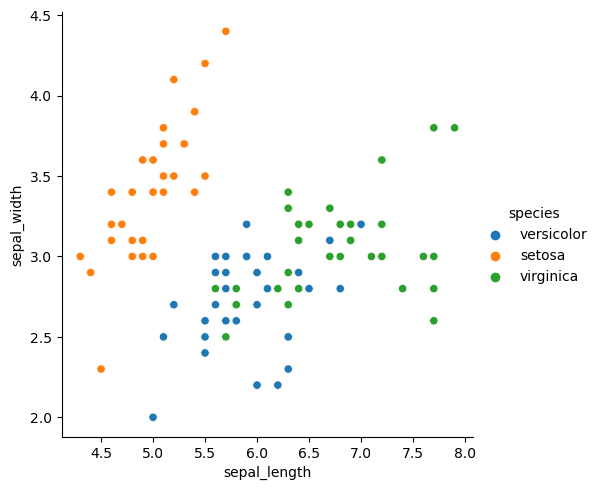

In [314]:
sns.relplot(x='sepal_length', y='sepal_width', data=train, hue='species')

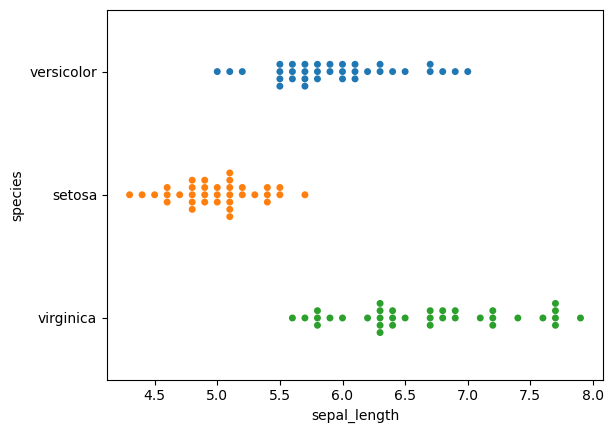

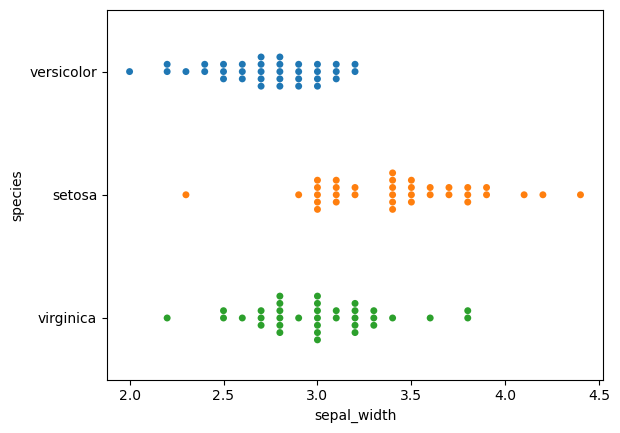

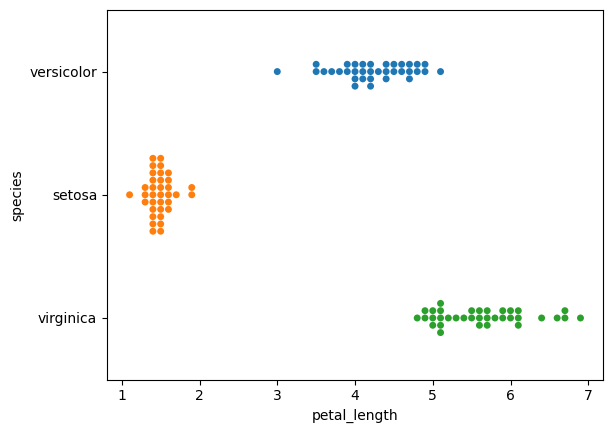

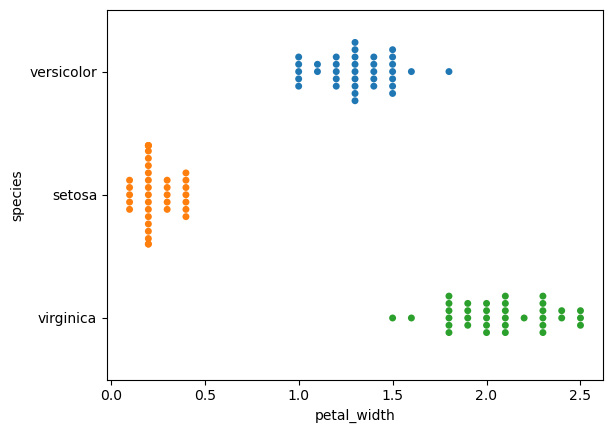

In [317]:
for col in num_vars:
    sns.swarmplot(x=col, y='species', data=train)
    plt.show()

In [500]:
train_melt = train.melt(id_vars=['species'], var_name='measures', value_name='values')
train_melt.head()

,species,measures,values
0,versicolor,sepal_length,5.1
1,versicolor,sepal_length,6.2
2,setosa,sepal_length,5.1
3,virginica,sepal_length,6.8
4,versicolor,sepal_length,5.7


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'sepal_length'),
  Text(1, 0, 'sepal_width'),
  Text(2, 0, 'petal_length'),
  Text(3, 0, 'petal_width'),
  Text(4, 0, 'species_versicolor'),
  Text(5, 0, 'species_virginica'),
  Text(6, 0, 'sepal_area'),
  Text(7, 0, 'petal_area')])

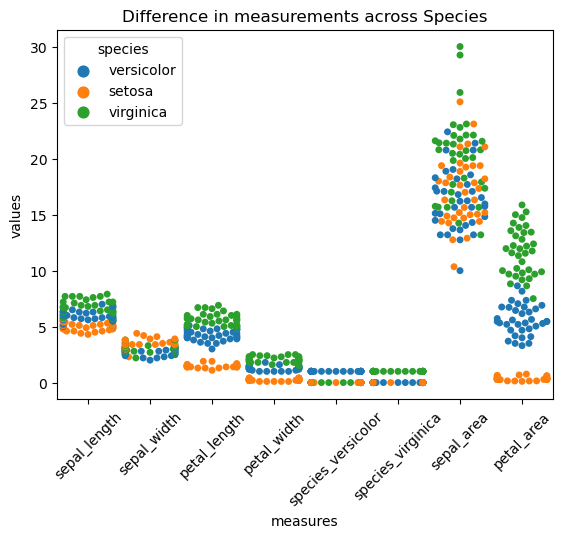

In [505]:
sns.swarmplot(x='measures', y='values', data=train_melt, hue='species')
plt.title('Difference in measurements across Species')
plt.xticks(rotation=45)

In [332]:
setosa = train[train['species'] == 'setosa']
setosa.drop(columns=['petal_length', 'petal_width', 'species', 
                     'species_versicolor', 'species_virginica'], inplace=True)


In [335]:
versicolor = train[train['species'] == 'versicolor']
versicolor.drop(columns=['petal_length', 'petal_width', 'species', 
                         'species_versicolor', 'species_virginica'], inplace=True)


In [464]:
setosa['area'] = setosa['sepal_length'] * setosa['sepal_width']
setosa.head()

,sepal_length,sepal_width,area
19,5.1,3.8,19.38
9,4.9,3.1,15.19
46,5.1,3.8,19.38
8,4.4,2.9,12.76
1,4.9,3.0,14.70


In [465]:
versicolor['area'] = versicolor['sepal_length'] * versicolor['sepal_width']
versicolor.head()

,sepal_length,sepal_width,area
98,5.1,2.5,12.75
68,6.2,2.2,13.64
99,5.7,2.8,15.96
78,6.0,2.9,17.40
80,5.5,2.4,13.20


H_0: Mean of setosa area <= mean of versicolor area  
H_A: Mean of setosa area > mean of versicolor area

In [353]:
t, p = stats.ttest_ind(setosa['area'], versicolor['area'])
t, p

(1.266469938033719, 0.20966601701205223)

In [354]:
alpha = .05

if p <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')



Fail to reject null


In [357]:
train['sepal_area'] = train['sepal_length'] * train['sepal_width']
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica,sepal_area
98,5.1,2.5,3.0,1.1,versicolor,1,0,12.75
68,6.2,2.2,4.5,1.5,versicolor,1,0,13.64
19,5.1,3.8,1.5,0.3,setosa,0,0,19.38
143,6.8,3.2,5.9,2.3,virginica,0,1,21.76
99,5.7,2.8,4.1,1.3,versicolor,1,0,15.96


<AxesSubplot:xlabel='sepal_area', ylabel='Count'>

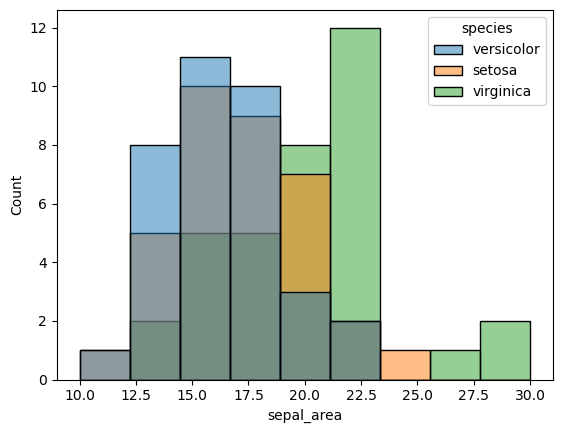

In [372]:
sns.histplot(x='sepal_area', data=train, hue='species')

- Takeaway: We fail to reject null. There is no significant difference in the mean area of setosa and versicolor

# Titanic

In [511]:
titanic = get_titanic_data(get_connection)
titanic = prep_titanic(titanic)
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [512]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sex                      891 non-null    object 
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   embark_town              889 non-null    object 
 7   alone                    891 non-null    int64  
 8   sex_male                 891 non-null    uint8  
 9   embark_town_Queenstown   891 non-null    uint8  
 10  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(5), object(2), uint8(3)
memory usage: 58.4+ KB


In [513]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [528]:
from prepare import train_val_test

train, val, test = train_val_test(titanic, 'survived')

In [515]:
num_vars = titanic.select_dtypes(exclude=['object', 'uint8'])
cat_vars = titanic.select_dtypes(include=['object', 'uint8'])

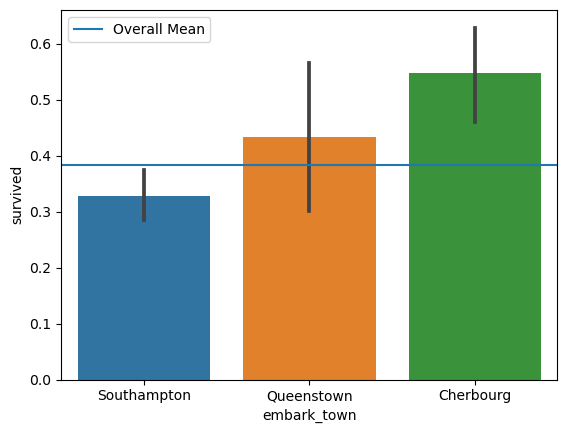

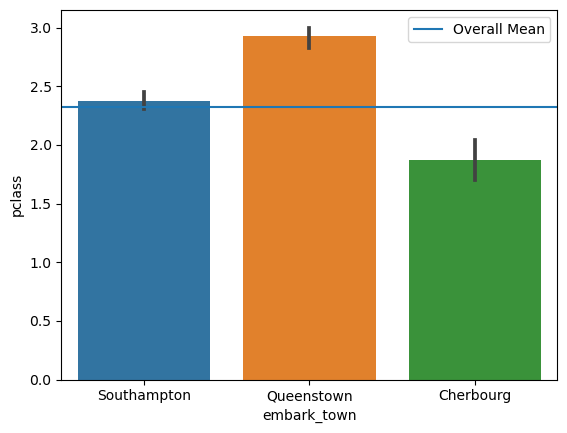

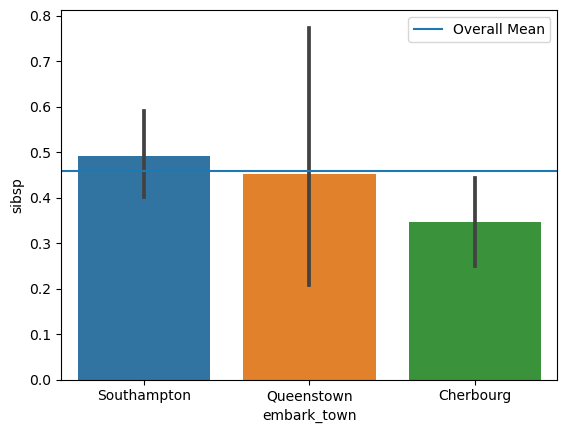

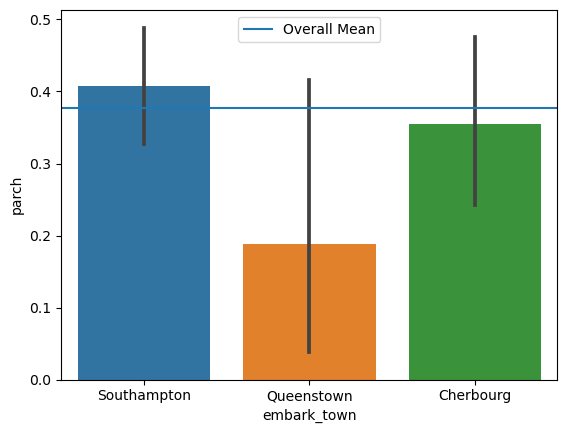

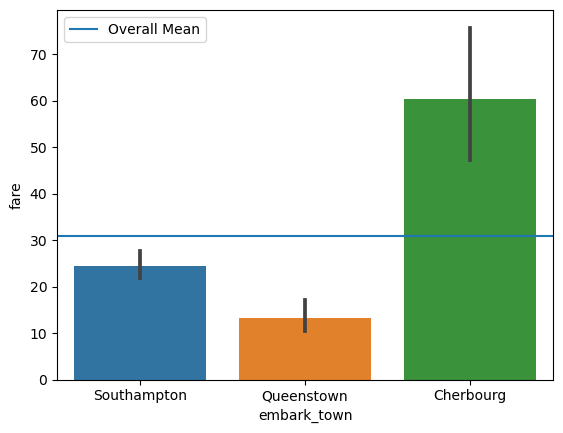

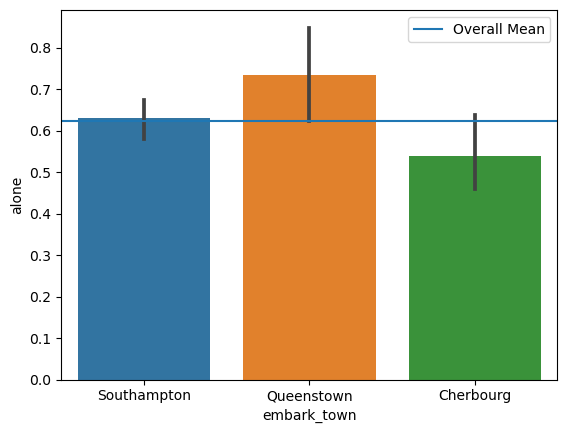

In [460]:
for col in num_vars:
    sns.barplot(x='embark_town', y=col, data=train)
    plt.axhline(train[col].mean(), label='Overall Mean')
    plt.legend()
    plt.show()

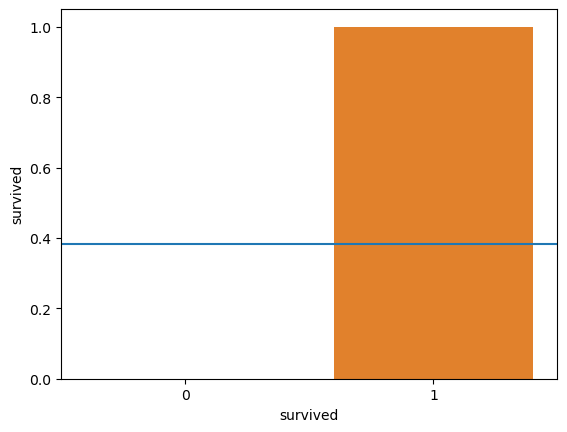

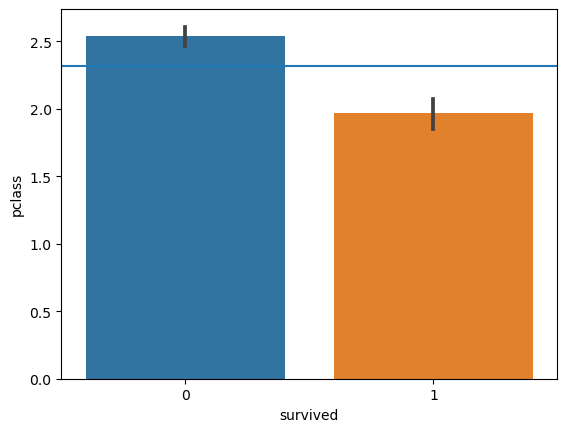

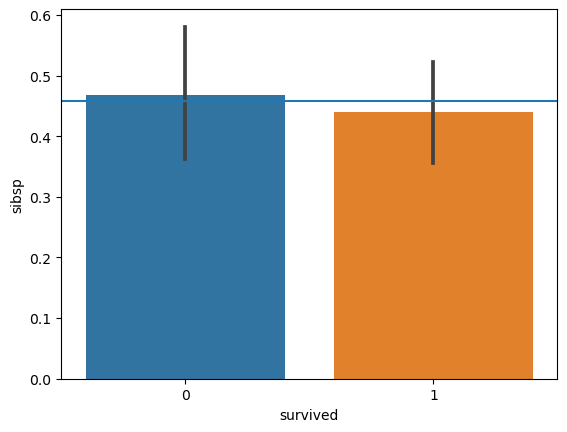

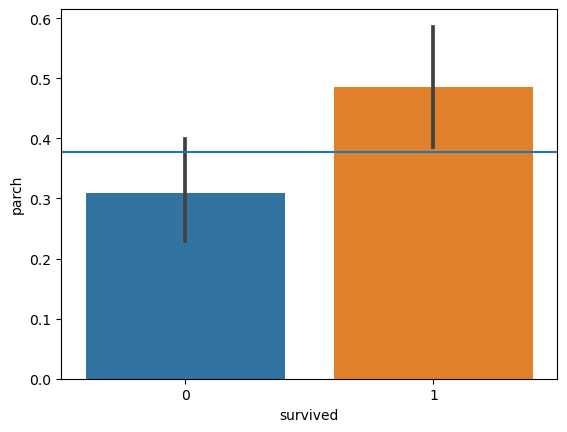

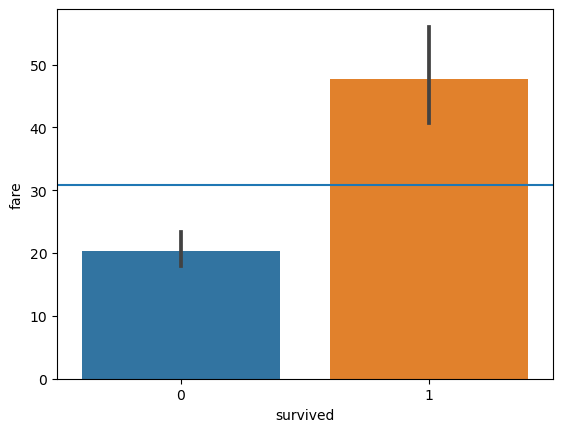

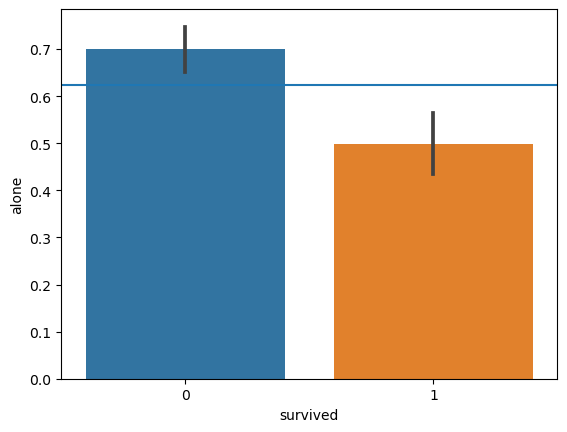

In [461]:
for col in num_vars:
    sns.barplot(x='survived', y=col, data=train)
    plt.axhline(train[col].mean(), label='Overall Mean')
    plt.show()

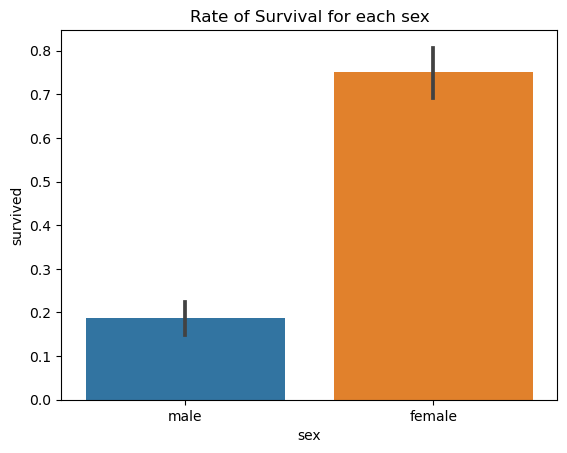

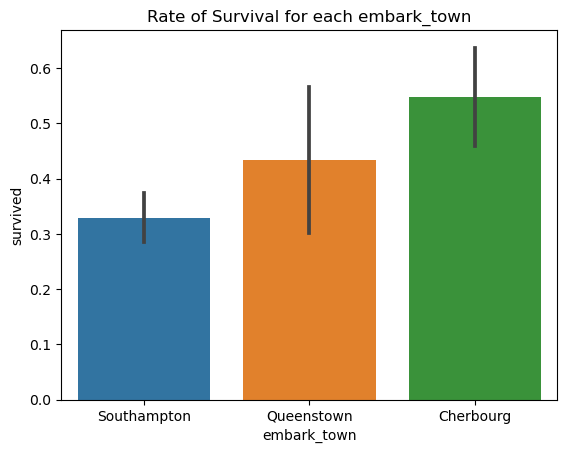

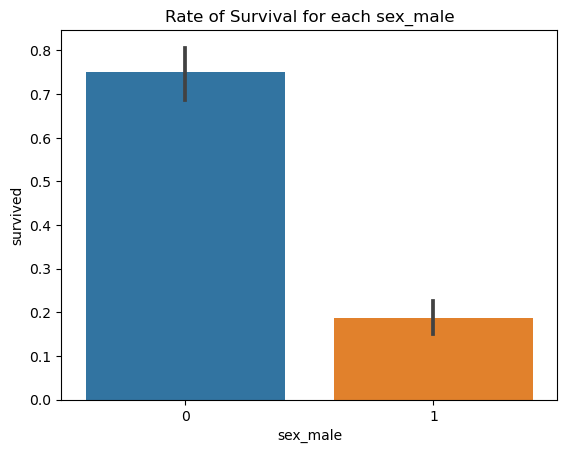

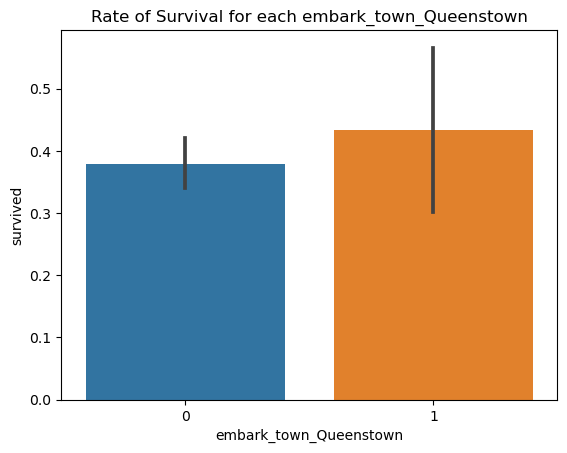

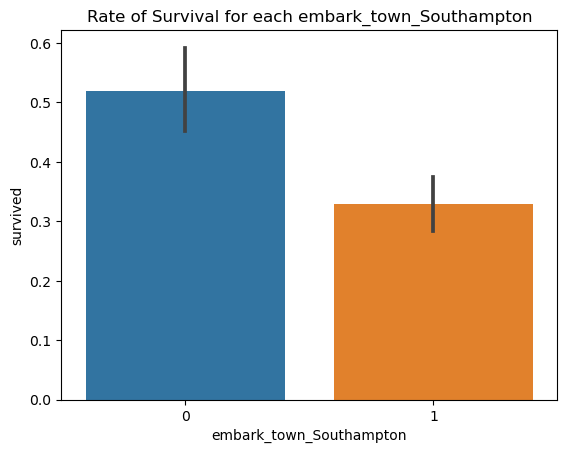

In [519]:
for col in cat_vars:
    sns.barplot(x=col, y='survived', data=train)
    plt.title(f'Rate of Survival for each {col}')
    plt.show()

## Takeaways:
- More likely to survive (based on visualizations): first class, women, traveling alone, 1 sibling or spouse.
- Drivers are sex, pclass, alone, sibsp
- We wouldnt want to bin fare as that won't add new value.
- No columns to be added now
- No features to be added right now
- Nothing surprising


**Is the impact of traveling alone different based on sex?**

<AxesSubplot:xlabel='alone', ylabel='survived'>

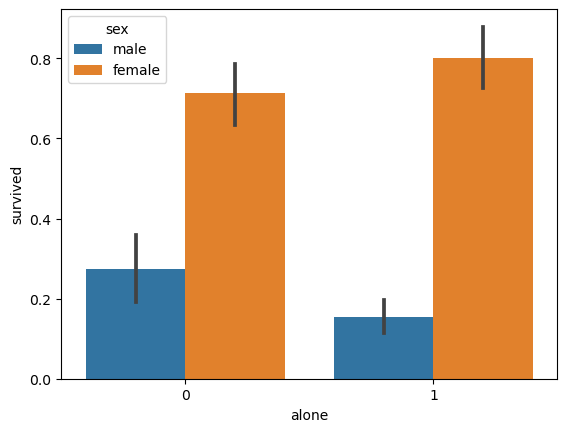

In [521]:
female = train[train['sex']=='female']
male = train[train['sex']=='male']

sns.barplot(x='alone', y='survived', data=train, hue='sex')

# it looks like being alone only impacts males, who are less likely to survive in that case


- it looks like being alone only impacts males, who are less likely to survive in that case

**Does class impact the survival rate of males or females**

<AxesSubplot:xlabel='pclass', ylabel='survived'>

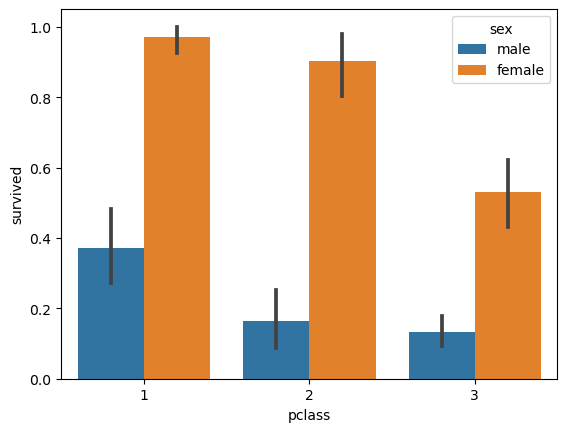

In [522]:
sns.barplot(x='pclass', y='survived', data=train, hue='sex')

- the females who didn't survive appear to be in 3rd class
- if a male survived, he was likely in 1st class

**of the females in 3rd class, were they more likely to survive if they were alone or not alone (or neither)**

<AxesSubplot:xlabel='pclass', ylabel='survived'>

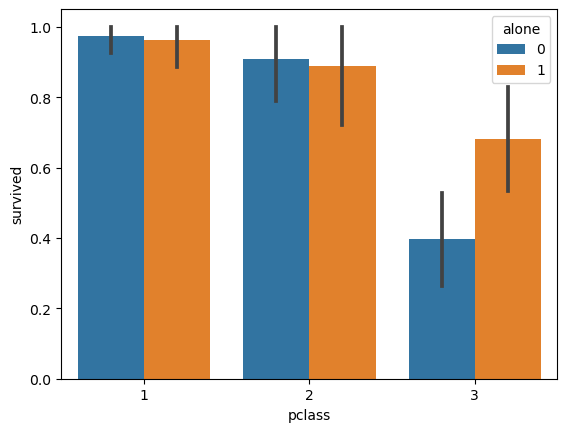

In [524]:
sns.barplot(x='pclass', y='survived', data=train[train['sex']=='female'], hue='alone')

Run a test to see if females in 3rd class who travel alone are significantly more likely to survive than those not traveling alone  
H_0: survivall rate of females in 3rd class alone <= survivale rate of females in 3rd class not alone  
H_A: survivall rate of females in 3rd class alone > survivale rate of females in 3rd class not alone

alpha = .05  
run a chi-square test 

In [532]:
sample = train[(train['pclass'] == 3) & (train['sex'] == 'female')]
observed = pd.crosstab(sample['alone'], sample['survived'])
chi2, p, df, expected = stats.chi2_contingency(observed)

alpha = .05

p< alpha

True

## Takeaways:
- it looks like being alone only impacts males, who are less likely to survive in that case
- the females who didn't survive appear to be in 3rd class
- if a male survived, he was likely in 1st class
- females appear more likely to survive if they were traveling alone


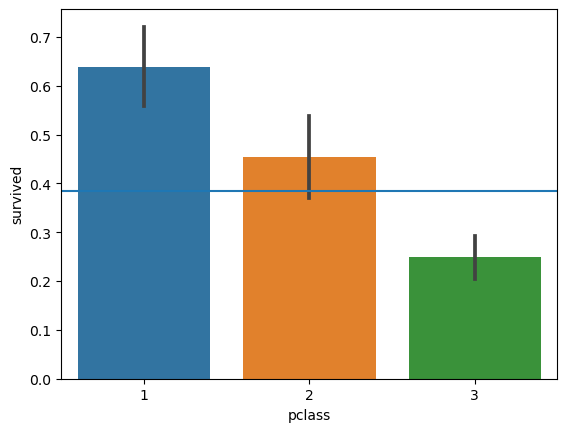

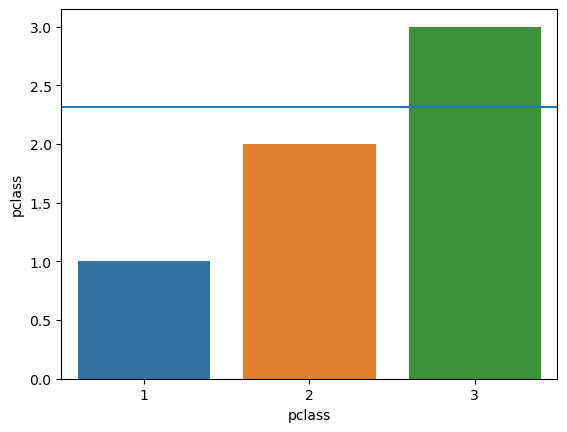

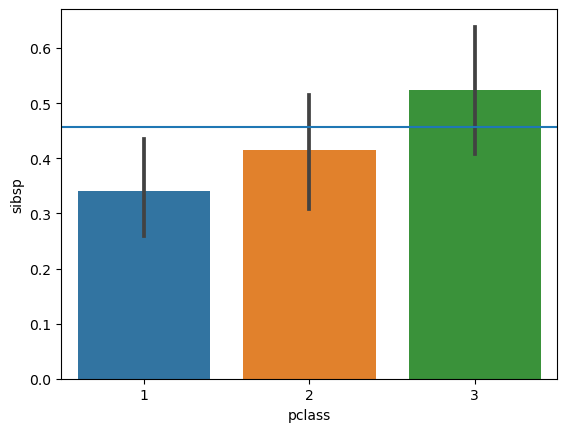

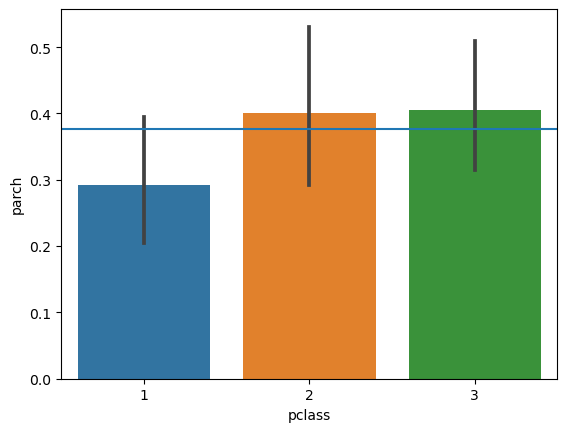

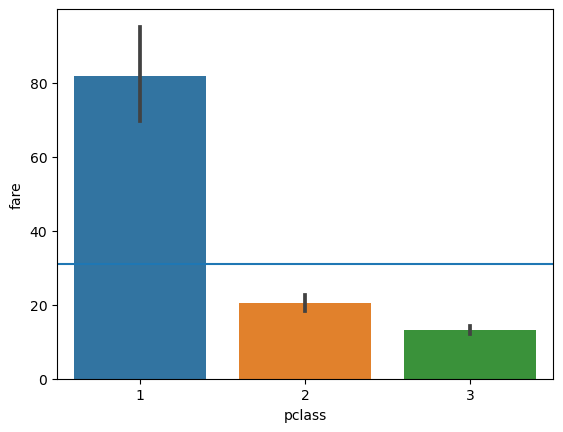

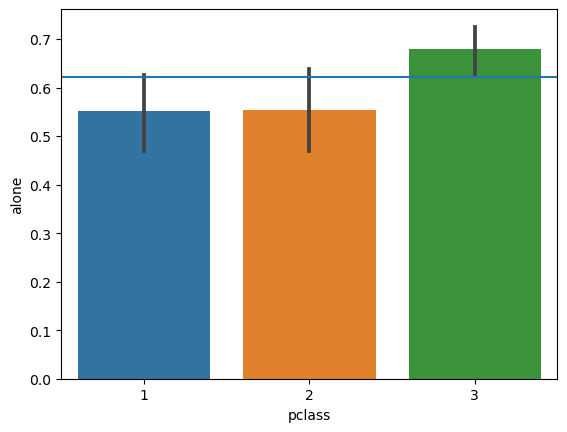

In [463]:
for col in num_vars:
    sns.barplot(x='pclass', y=col, data=train)
    plt.axhline(train[col].mean(), label='Overall Mean')
    plt.show()

- Takeaways: 
- Females had a much higher chance of survival.
- The higher the class someone is the higher chance of survival they have.
- If someone is alone they have a lower chance of survival.
- The fare for getting on at Cherbourg is significantly higher than the mean.
- Those getting on at Cherbourg had a higher chance of surviving than the mean.


- Binning the fares would help to compare it against other columns and data.

## Telco

In [474]:
from acquire import get_telco_data

telco = get_telco_data(get_connection)
telco = prep_telco(telco)
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,0,0,1,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,1,1,0,0,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,1,1,1,0,0,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,1,1,1,0,0,0,0,0,1


In [475]:
train, val, test = train_val_test(telco, 'gender')

In [476]:
num_vars_telco = telco.select_dtypes(exclude=['object', 'uint8'])
cat_vars_telco = telco.select_dtypes(include=['object', 'uint8'])

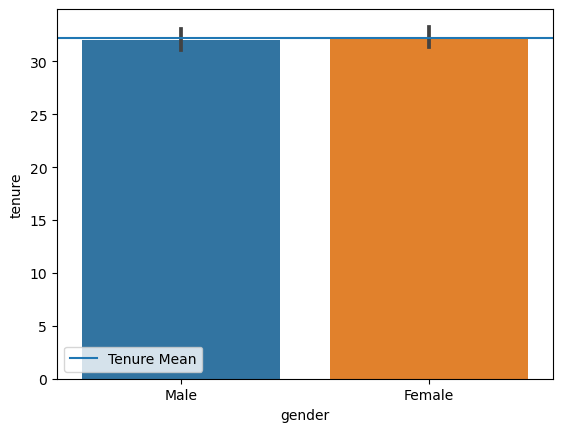

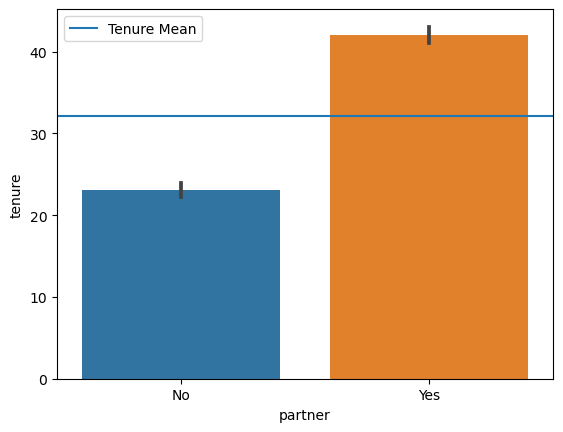

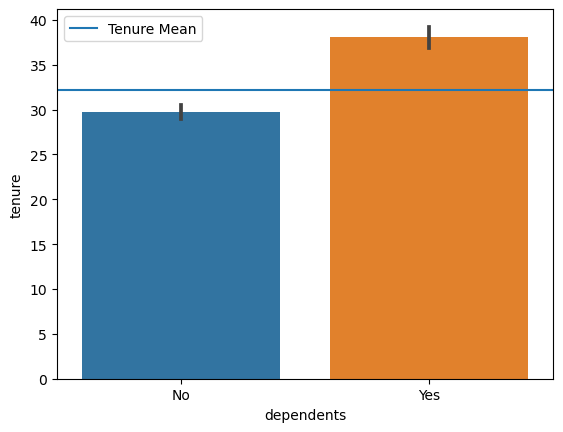

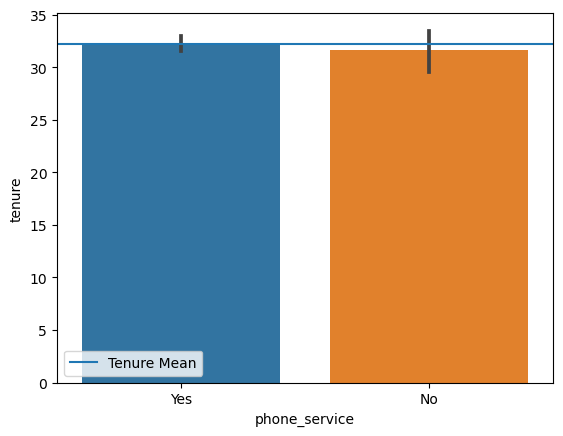

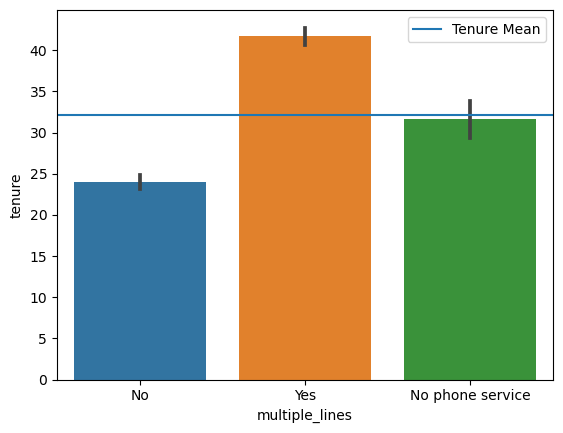

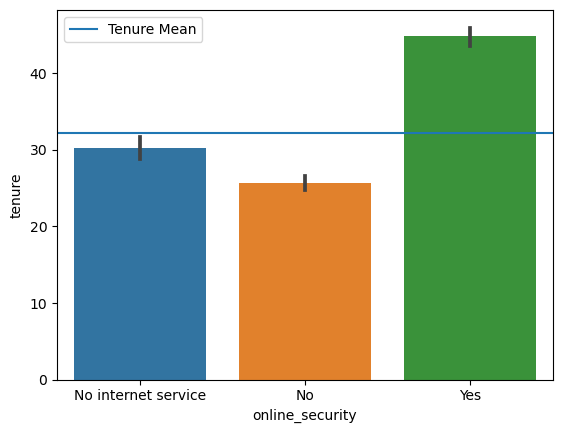

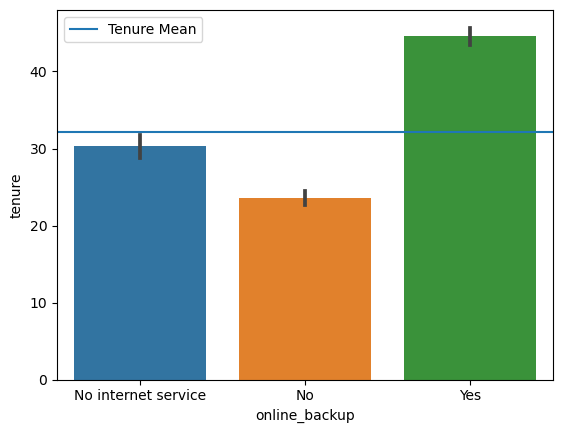

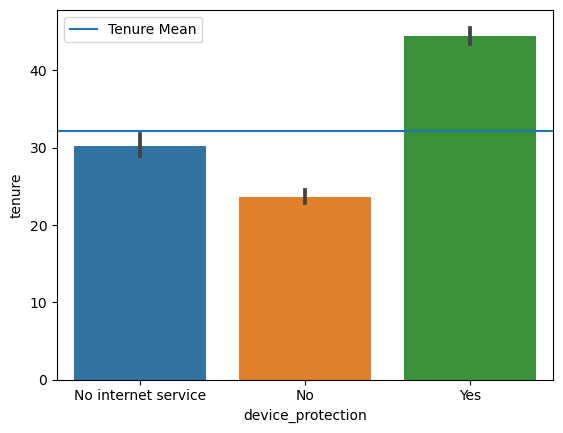

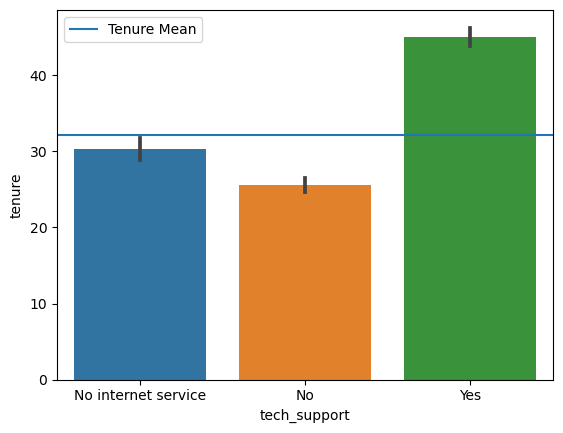

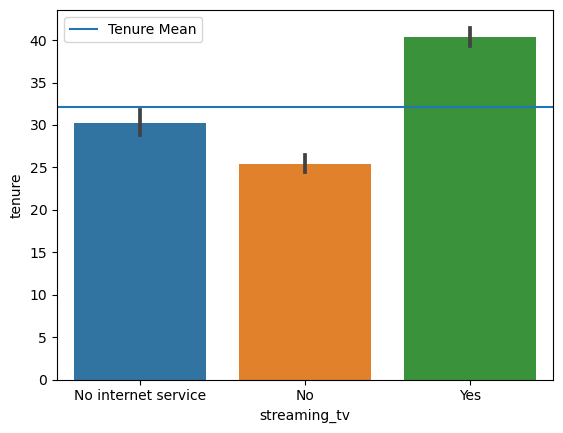

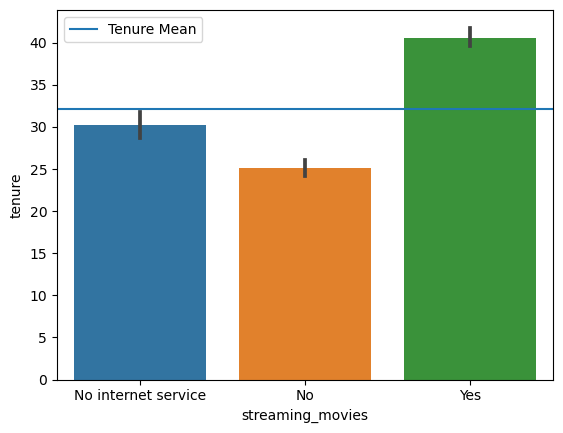

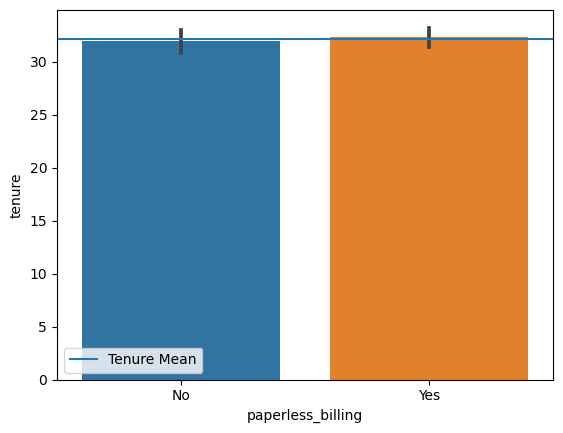

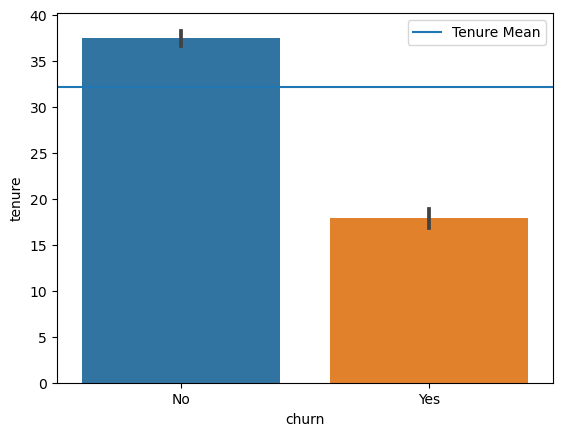

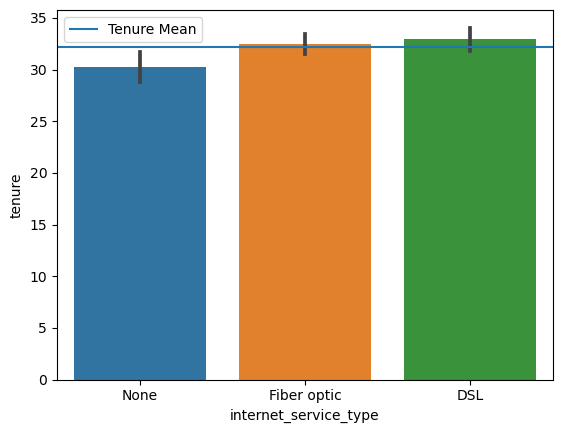

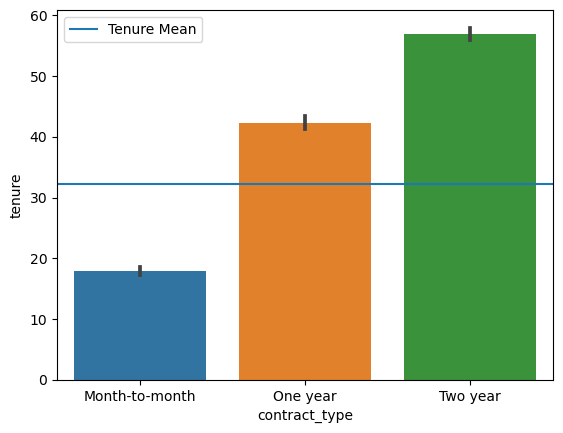

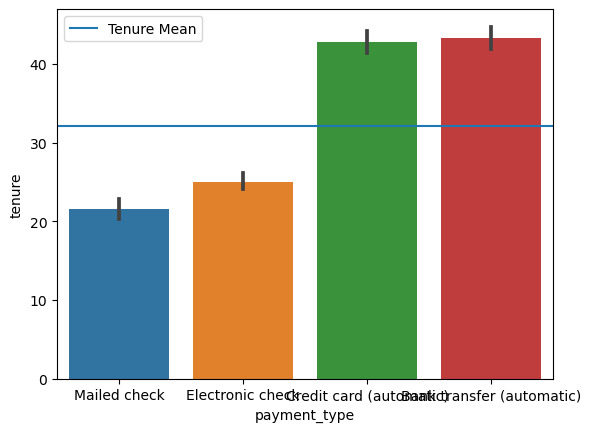

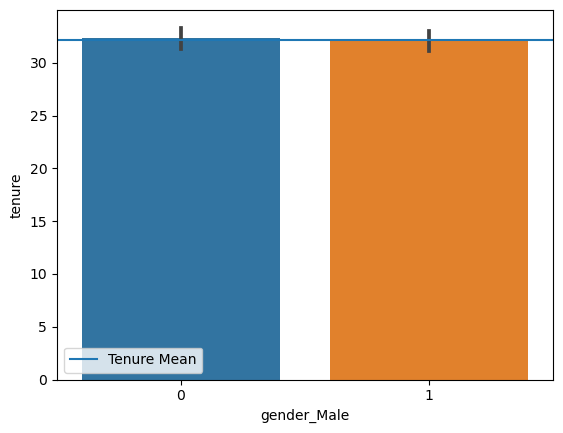

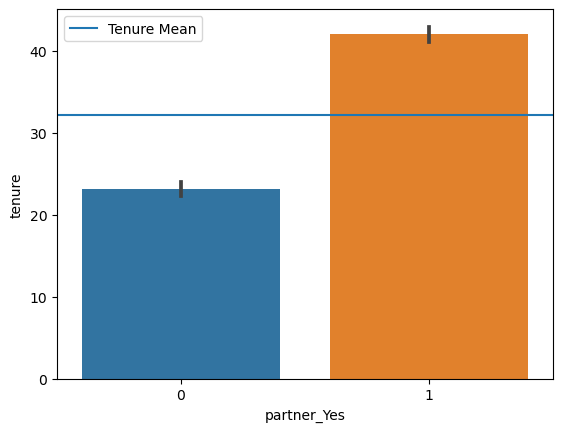

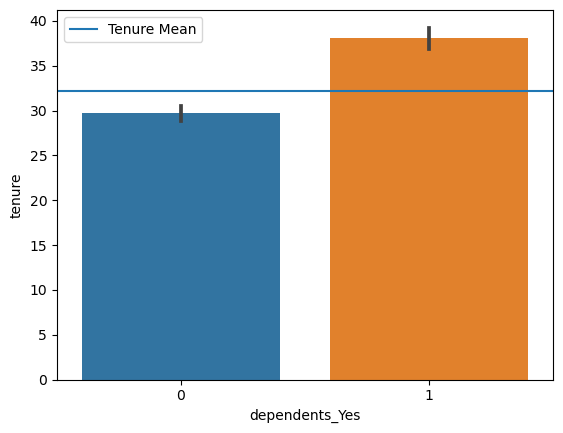

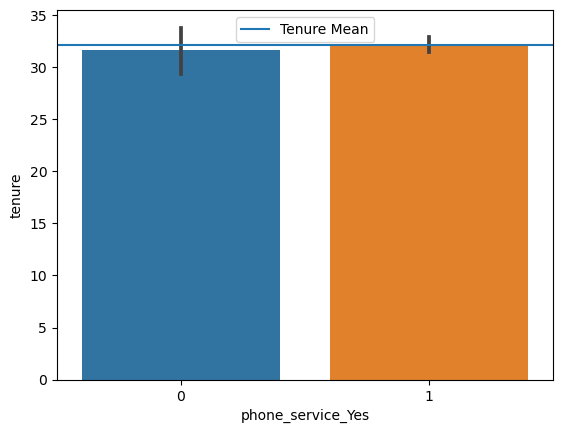

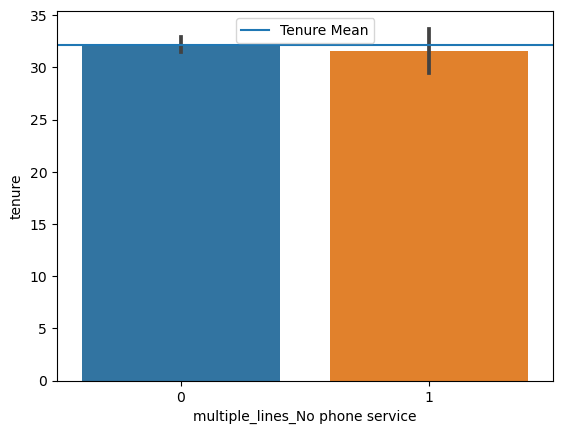

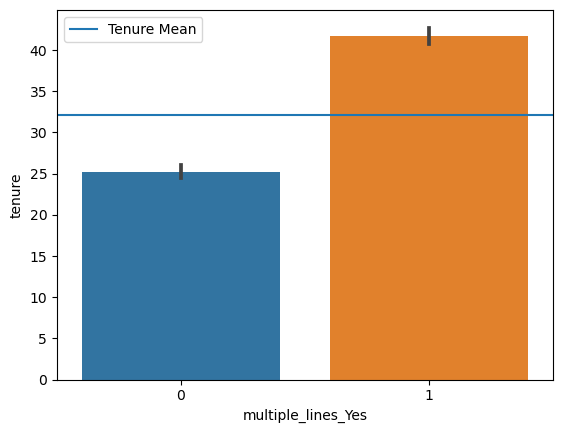

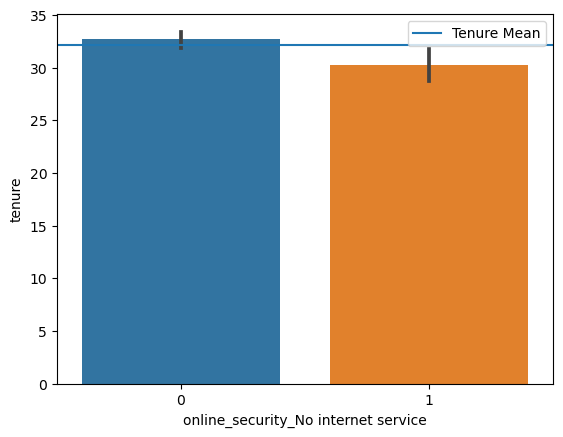

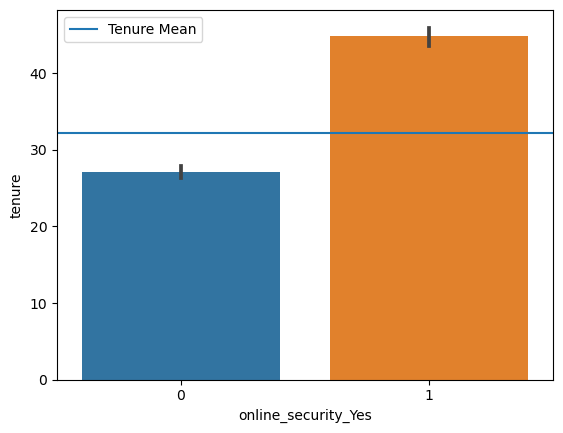

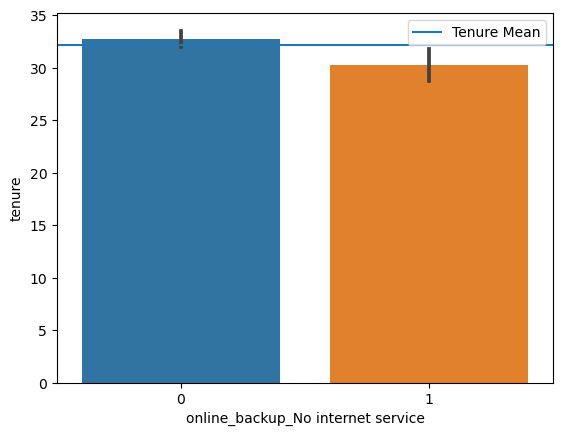

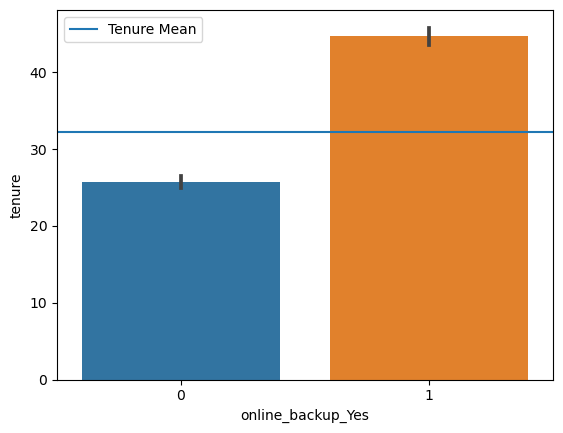

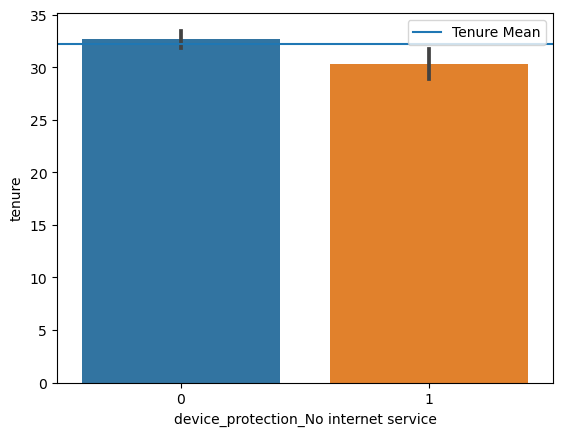

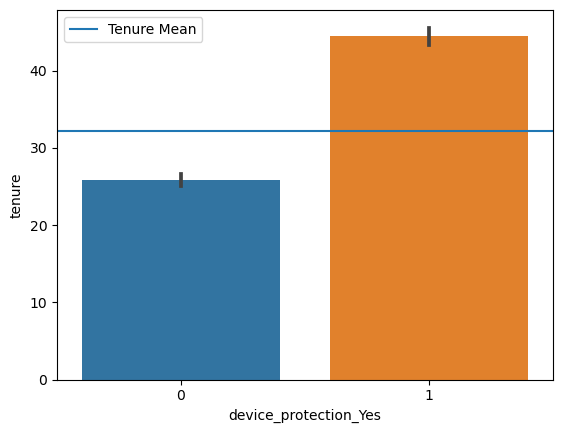

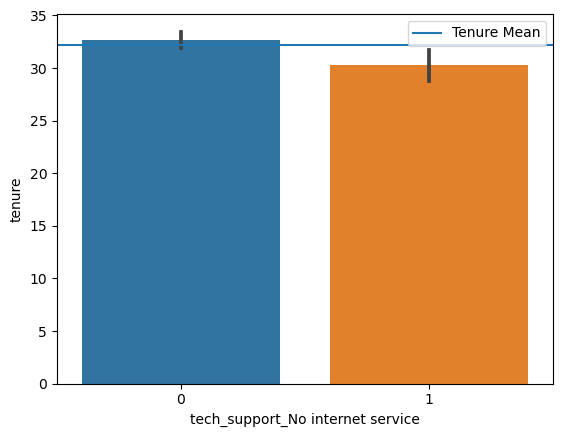

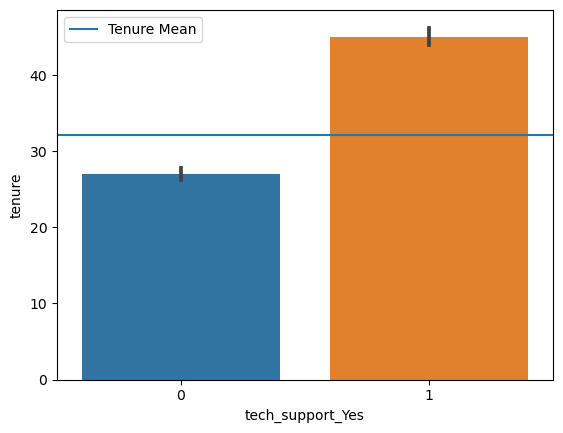

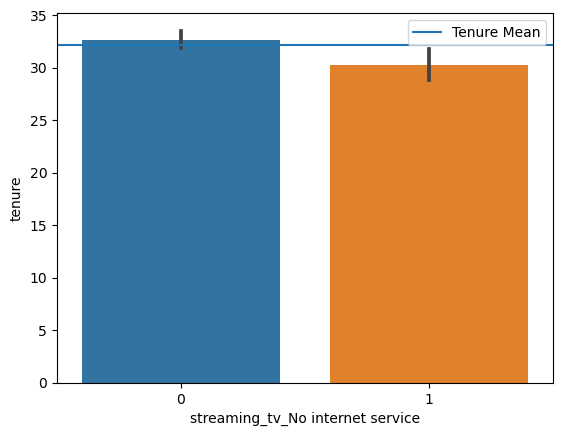

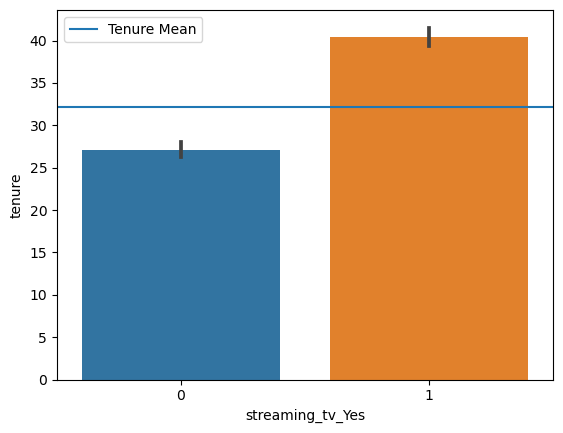

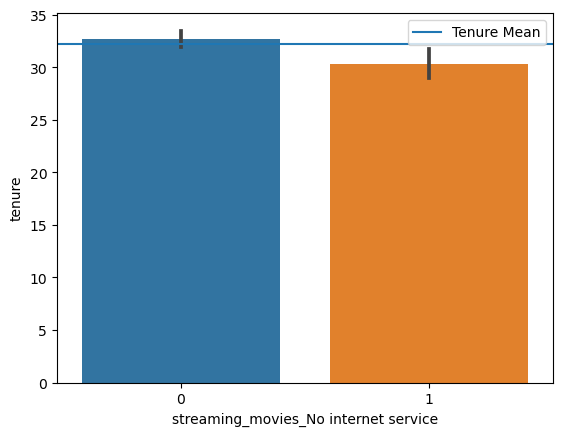

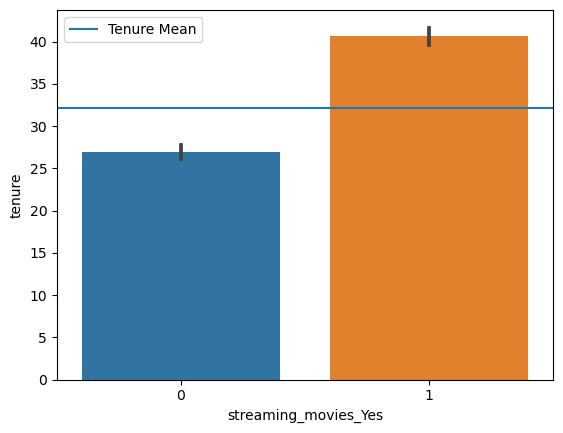

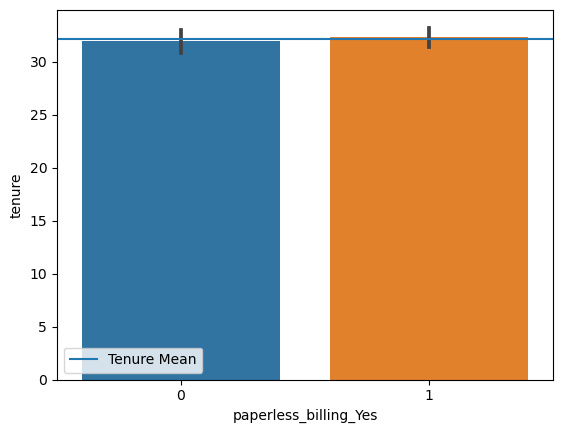

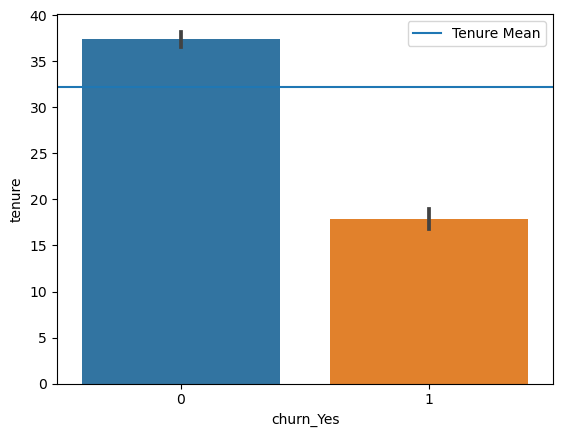

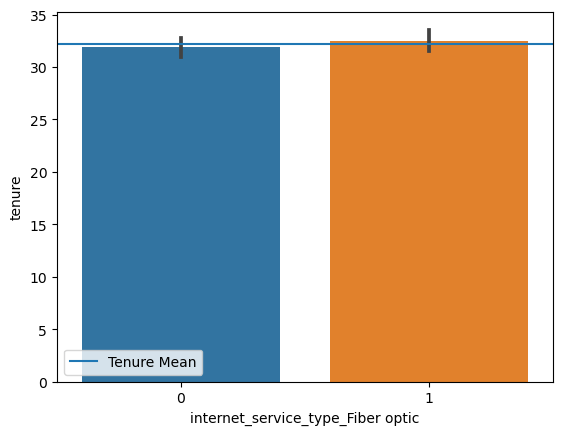

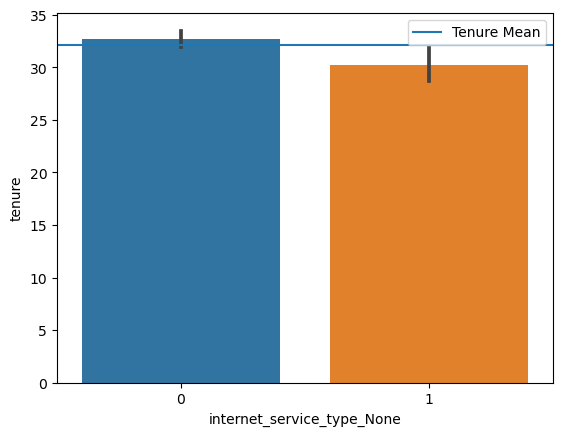

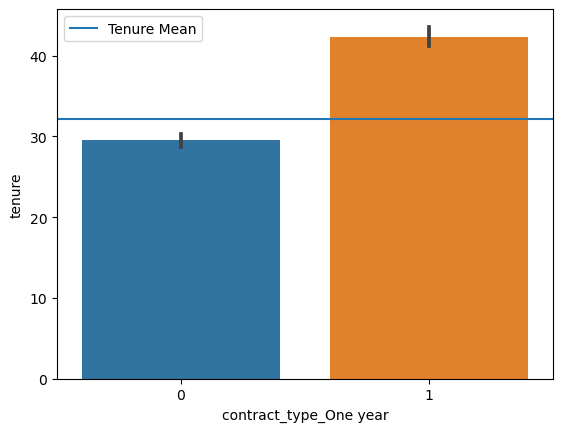

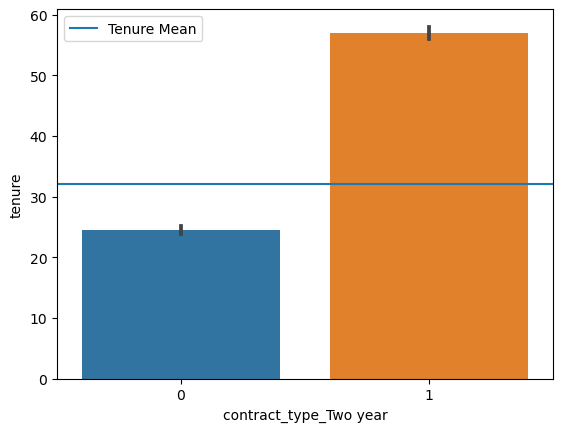

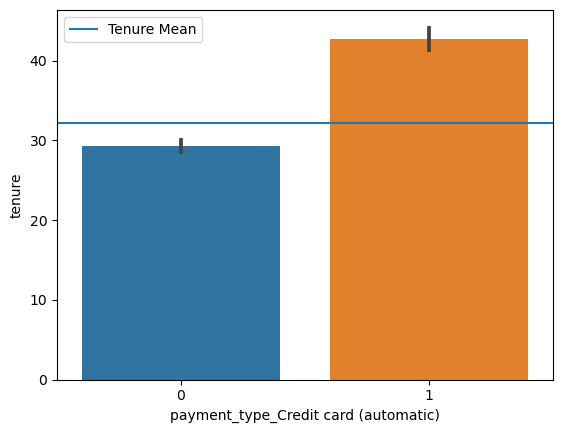

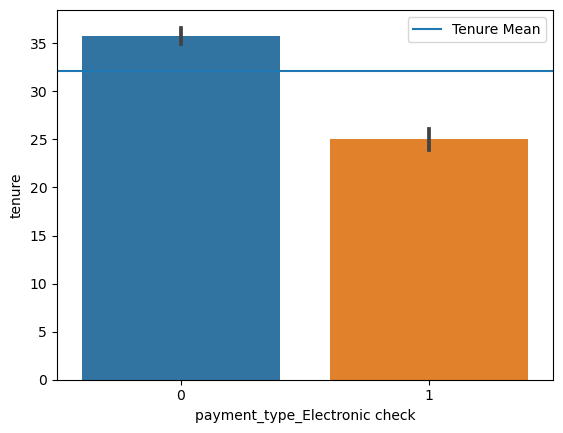

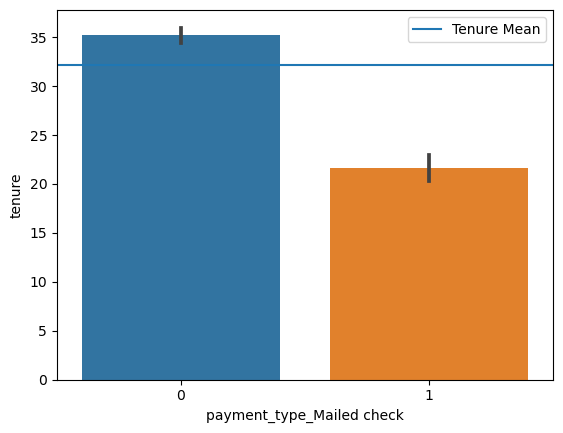

In [477]:
for col in cat_vars_telco:
    sns.barplot(x=col, y='tenure', data=train)
    plt.axhline(train['tenure'].mean(), label='Tenure Mean')
    plt.legend()
    plt.show()

- Takeaways:
- Those with a partner tend to stay longer than those without.
- Those with dependents have a higher tenure than those without.
- Those with add-ons stay longer.
- Those with automatic payments have a higher tenure.
- Month-to-month contract types have a higher churn rate.


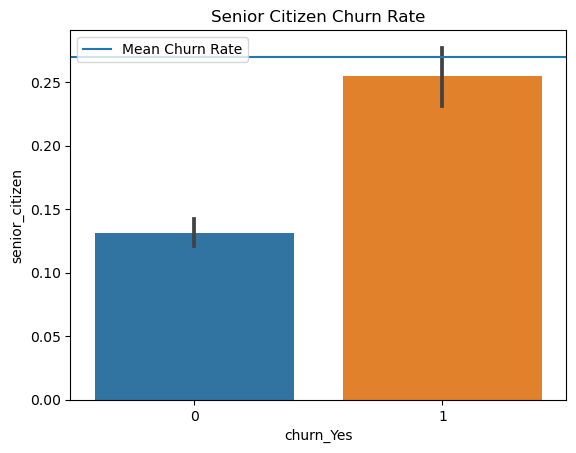

In [483]:
sns.barplot(x='churn_Yes', y='senior_citizen', data=train)
plt.title('Senior Citizen Churn Rate')
plt.axhline(train['churn_Yes'].mean(), label='Mean Churn Rate')
plt.legend()

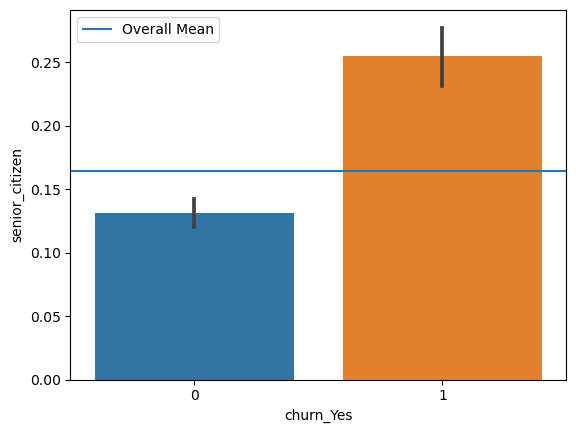

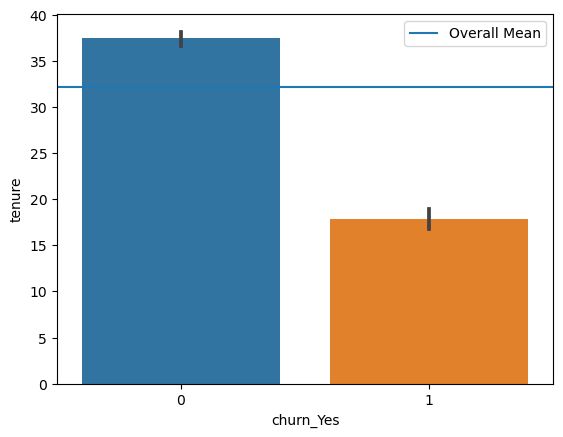

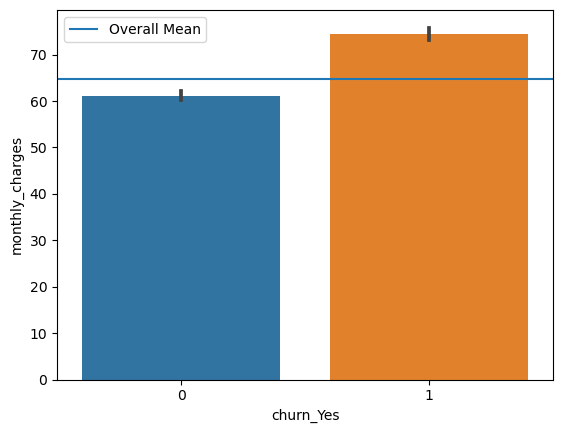

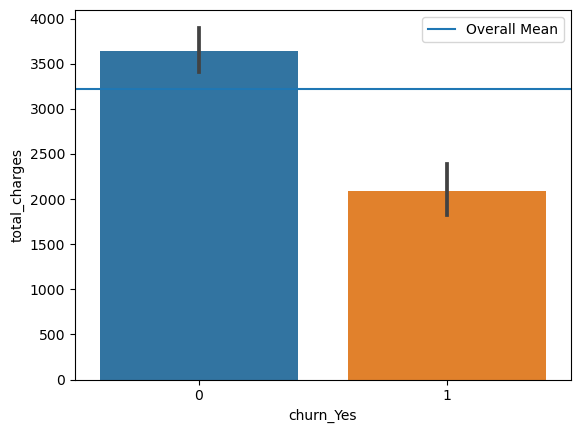

In [484]:
 for col in num_vars_telco:
    sns.barplot(x='churn_Yes', y=col, data=train)
    plt.axhline(train[col].mean(), label='Overall Mean')
    plt.legend()
    plt.show()

- Takeaways:
- Those with higher monthly charges are more likely to churn.
- Senior citizens are more likely to churn.
- Combining the payment types into groups of automatic and manual would help to compare against other data.
